In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#check for null values 
df = pd.read_csv('data/NGAFID_MC_C28.csv')
print(df.isnull().sum())

volt1              2357
volt2           1986719
amp1               3646
amp2            1986857
FQtyL              4969
FQtyR              2513
E1 FFlow           2798
E1 OilT            2939
E1 OilP            3034
E1 RPM             3052
E1 CHT1           56200
E1 CHT2         1995886
E1 CHT3         1991191
E1 CHT4         1987669
E1 EGT1            3598
E1 EGT2            3612
E1 EGT3            3699
E1 EGT4            3765
OAT               15361
IAS               15170
VSpd              15605
NormAc            24458
AltMSL            12796
id                    0
plane_id              0
split                 0
date_diff             0
before_after          0
dtype: int64


In [5]:
#group the data by plane_id without disturbing the order of the data
plane_id_groups = df.groupby('plane_id', sort=False)

#save each group to a csv file in the 'planes' folder and name of the file is the plane_id
for plane_id, group in plane_id_groups:
    group.to_csv('data/planes/'+str(plane_id)+'.csv', index=False)


In [2]:
plane_ids_with_complete_columns_missing = {}
plane_id_groups = df.groupby('plane_id')
for plane_id, group in plane_id_groups:
    num_rows = group.shape[0]
    num_missing = group.isnull().sum()
    for column in num_missing.index:
        if num_missing[column] == num_rows:
            plane_ids_with_complete_columns_missing.setdefault(plane_id, []).append(column)


#give a structured print of the plane_ids with complete columns missing
for plane_id, columns in plane_ids_with_complete_columns_missing.items():
    print(f"Plane ID: {plane_id} has the following columns missing: {columns}")






Plane ID: 69 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 70 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 71 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 72 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 73 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 74 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 75 has the following columns missing: ['volt2', 'amp2', 'E1 CHT1', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 76 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']
Plane ID: 77 has the following columns missing: ['volt2', 'amp2', 'E1 CHT2', 'E1 CHT3', 'E1 CHT4']


/var/folders/k_/mxrh7nj55tl1jtzf2n_d0swm0000gn/T/ipykernel_23682/2989841740.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_values_per_plane_id = df.groupby('plane_id').apply(lambda x: x.isnull().sum().sum())


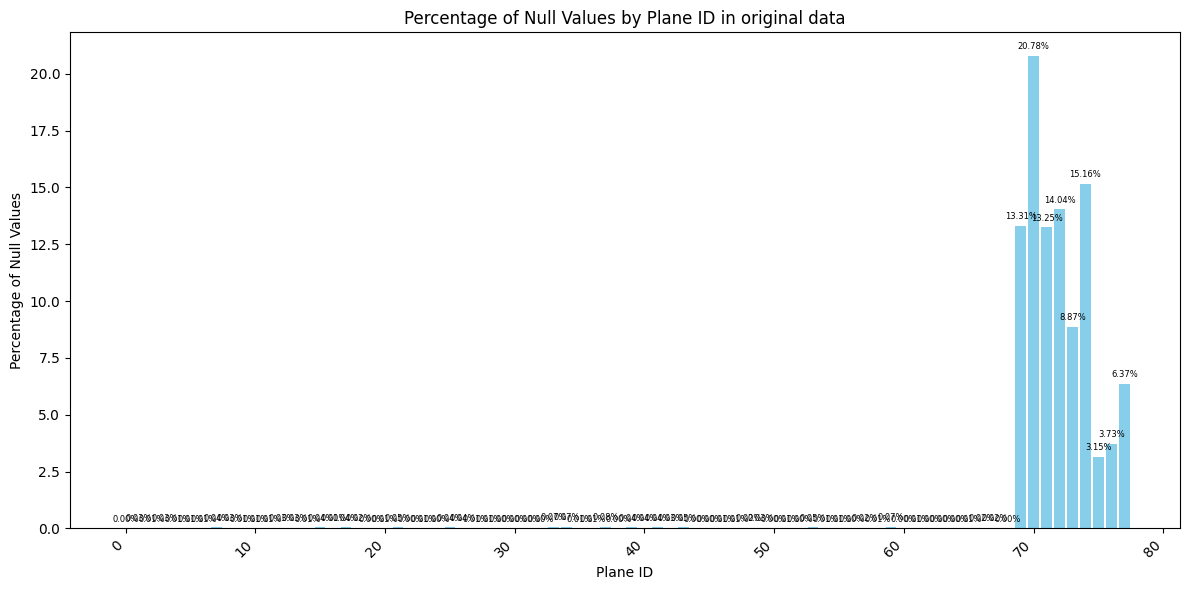

In [21]:
# Calculate the total number of null values in the dataset
total_null_values = df.isnull().sum().sum()

# Calculate the number of null values per 'plane_id'
null_values_per_plane_id = df.groupby('plane_id').apply(lambda x: x.isnull().sum().sum())

# Calculate the percentage of null values per 'plane_id'
percentage_null_values_per_plane_id = (null_values_per_plane_id / total_null_values) * 100

# Plot the results
plt.figure(figsize=(12, 6))
bars = plt.bar(percentage_null_values_per_plane_id.index, percentage_null_values_per_plane_id, color='skyblue')
plt.title('Percentage of Null Values by Plane ID in original data')
plt.xlabel('Plane ID')
plt.ylabel('Percentage of Null Values')

# Annotate each bar with its percentage value
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.2,  # Position slightly above the bar
        f'{height:.2f}%', 
        ha='center', 
        va='bottom', 
        fontsize= 6
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
# check if there is any plane_id with 0 null values
no_null_values_plane_ids = percentage_null_values_per_plane_id[percentage_null_values_per_plane_id == 0]
print(no_null_values_plane_ids)

Series([], dtype: float64)


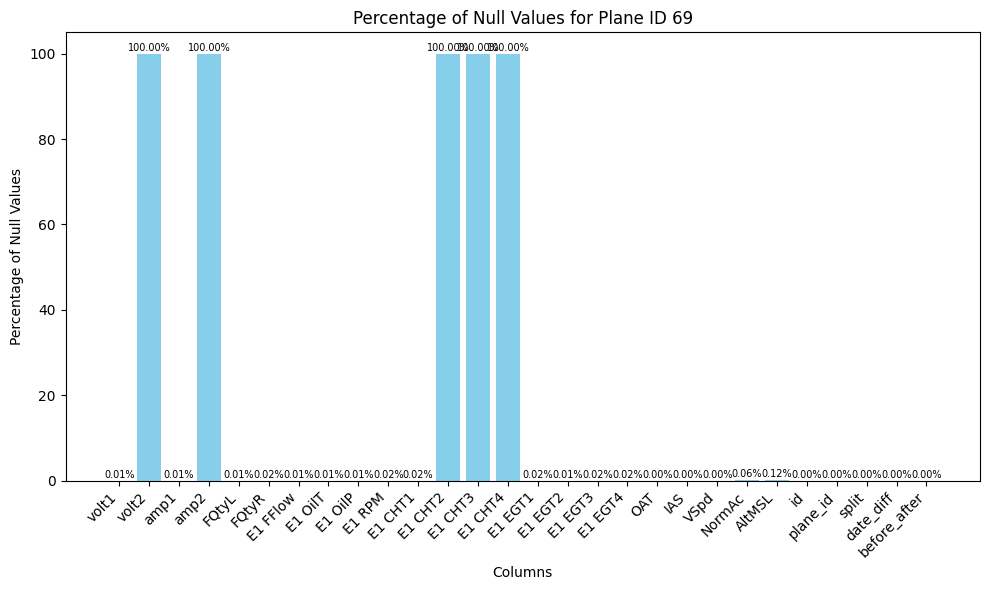

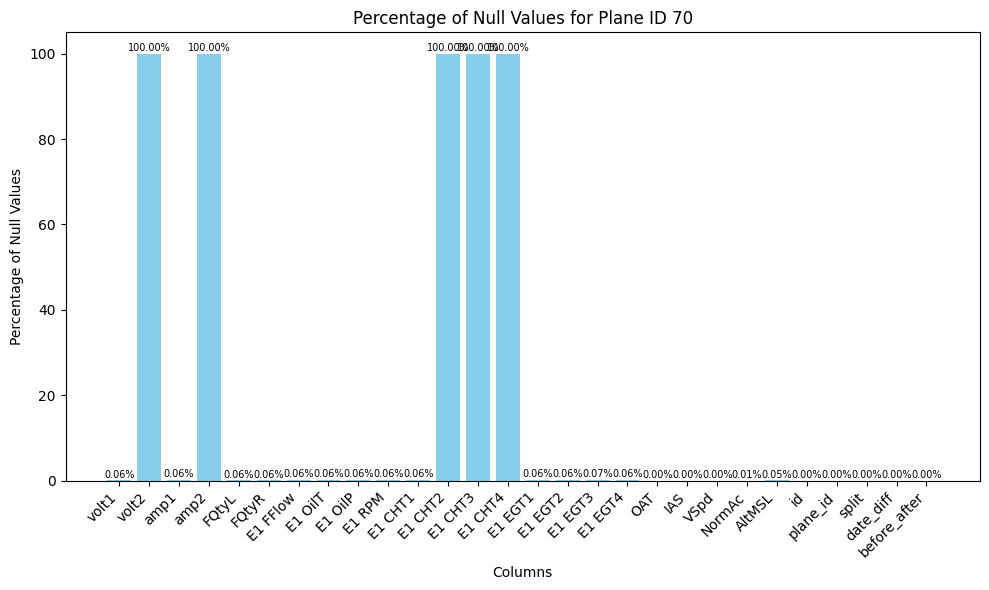

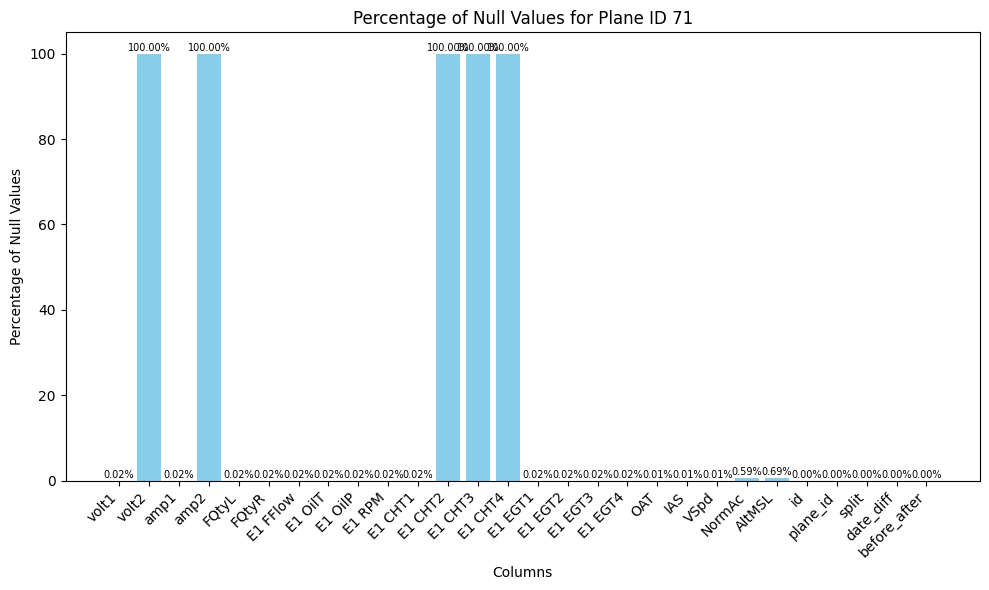

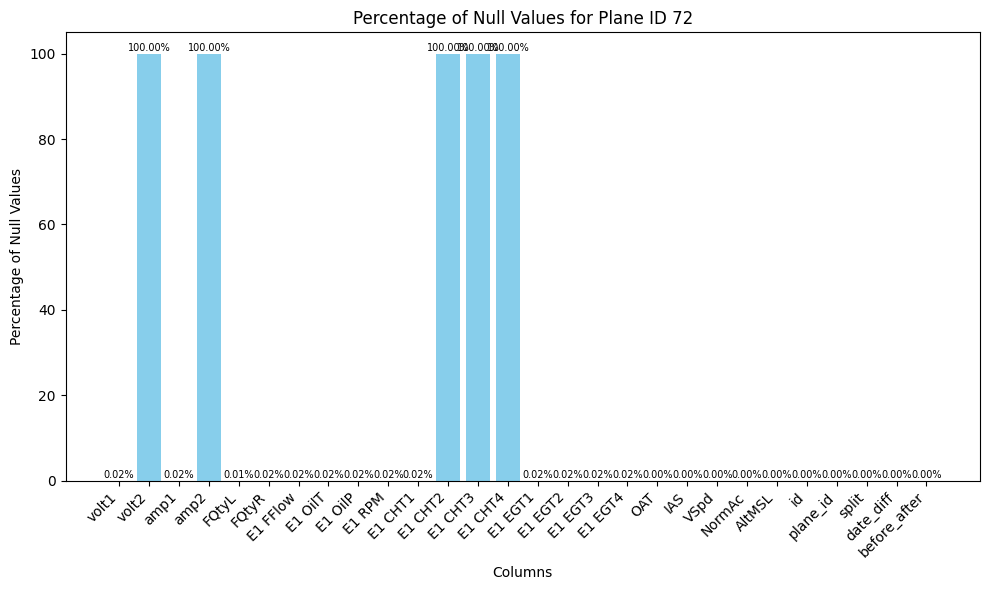

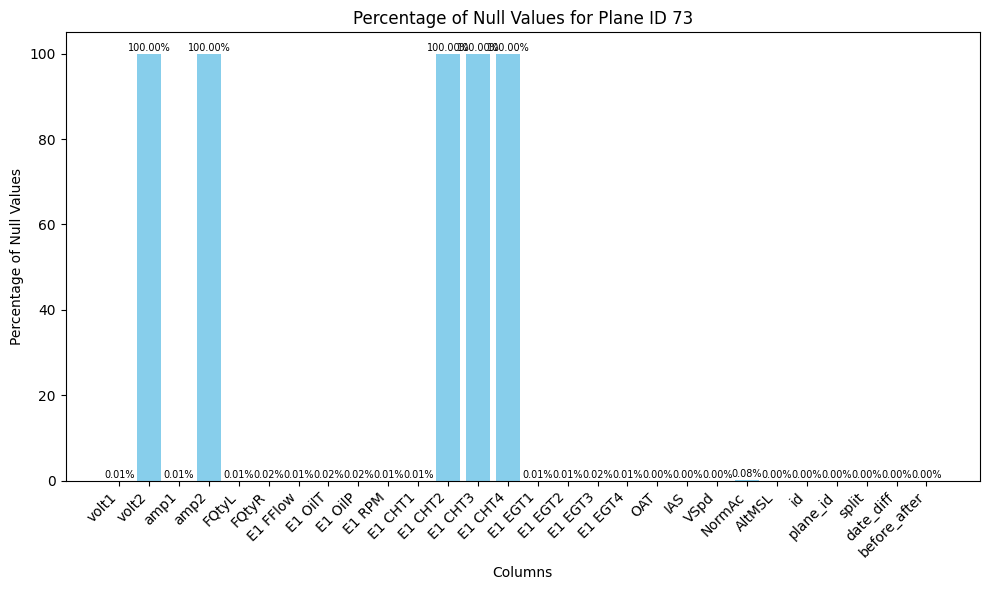

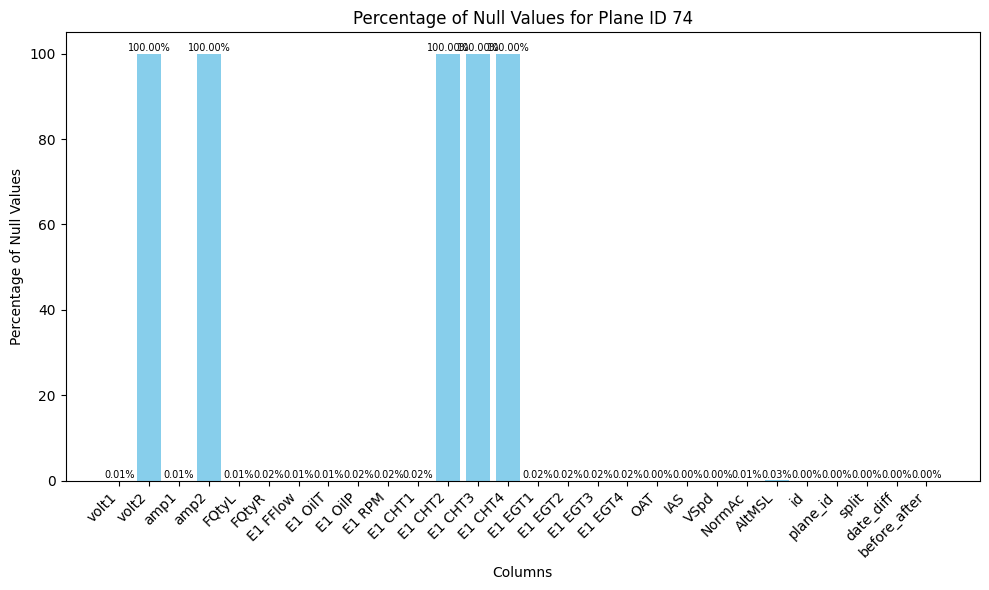

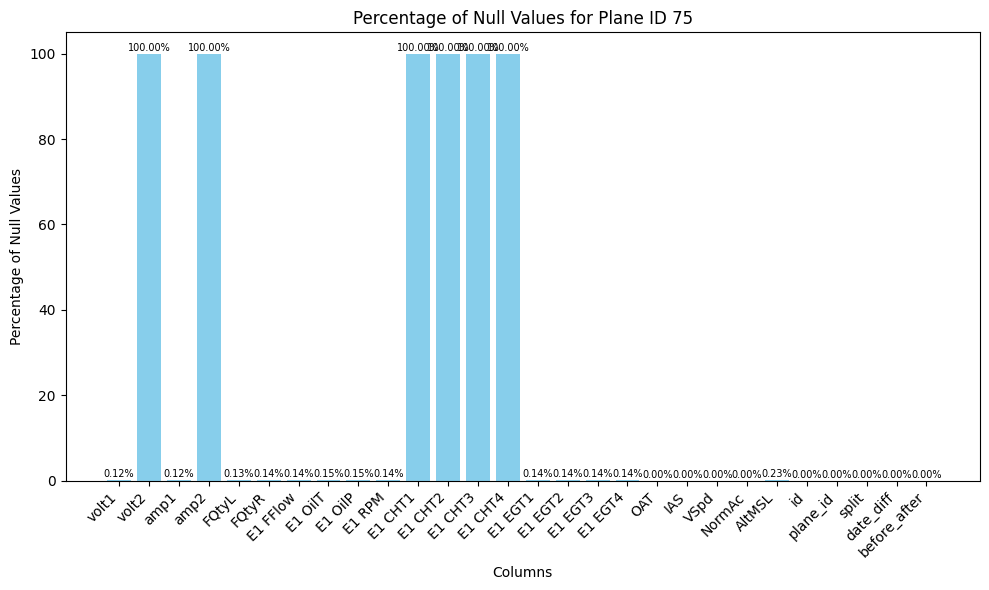

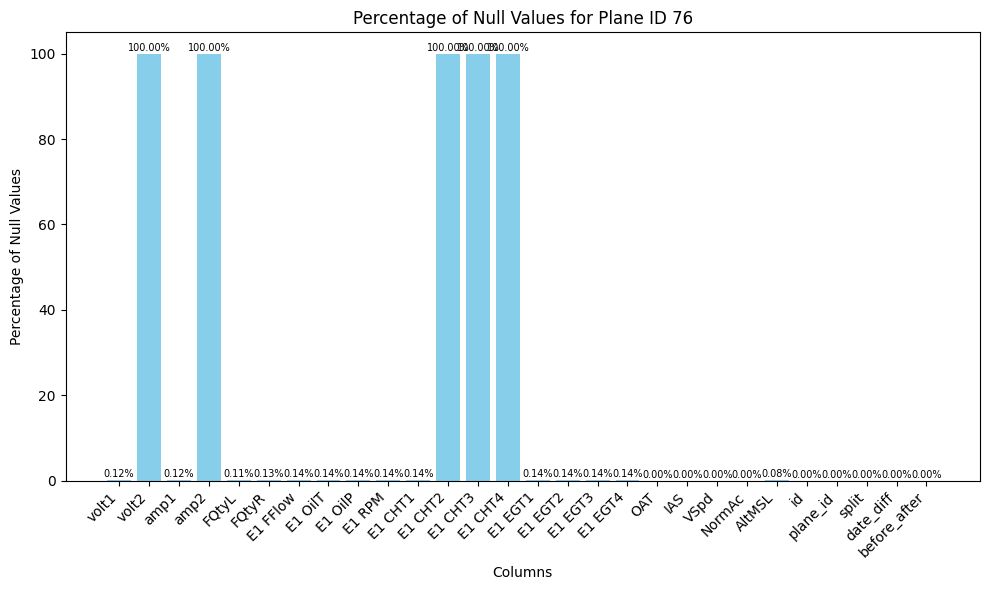

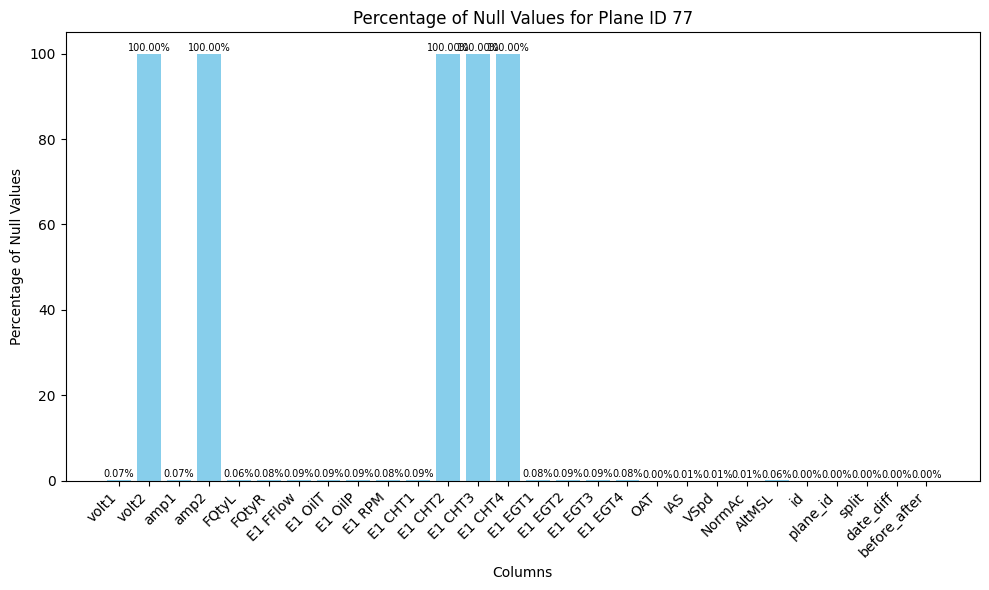

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

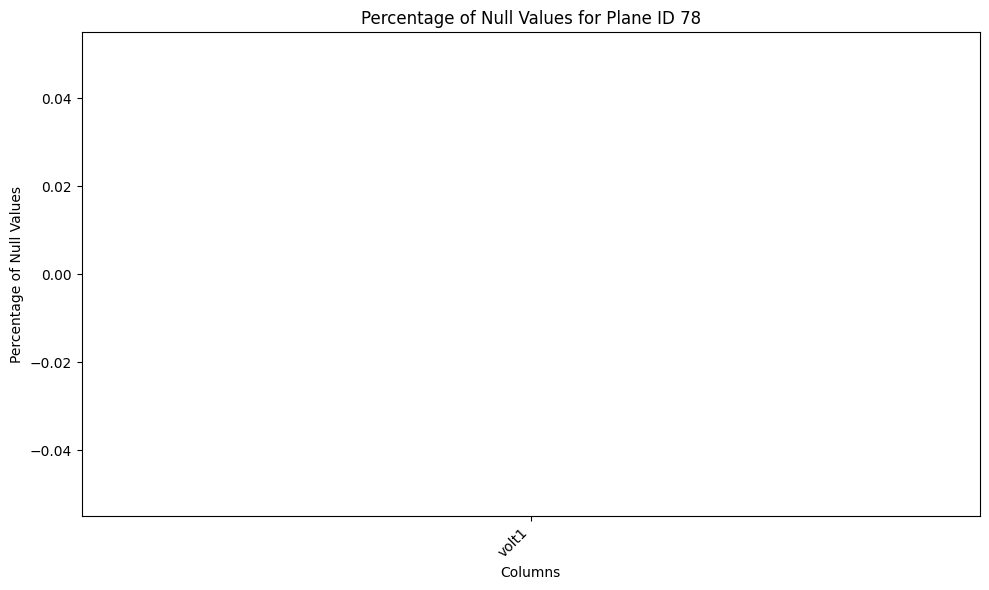

In [32]:

# Calculate the percentage of null values in each column for plane_id 69 to 78
for plane_id in range(69, 79):
    plane_data = df[df['plane_id'] == plane_id]
    null_values = plane_data.isnull().sum() / len(plane_data) * 100
    
    # Plot the percentage of null values
    plt.figure(figsize=(10, 6))
    bars = plt.bar(null_values.index, null_values, color='skyblue')
    plt.title(f'Percentage of Null Values for Plane ID {plane_id}')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Null Values')

    # Annotate each bar with its percentage value
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.2, 
            f'{height:.2f}%', 
            ha='center', 
            va='bottom', 
            fontsize=7
        )

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [3]:
# Define the problematic plane_ids
problematic_plane_ids = [69, 70, 71, 72, 73, 74, 75, 76, 77, 78]

# Filter out the problematic plane_ids
cleaned_data = df[~df['plane_id'].isin(problematic_plane_ids)]

# Verify the cleaned data
print(sorted(cleaned_data['plane_id'].unique(), key = lambda x: int(x)))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68)]


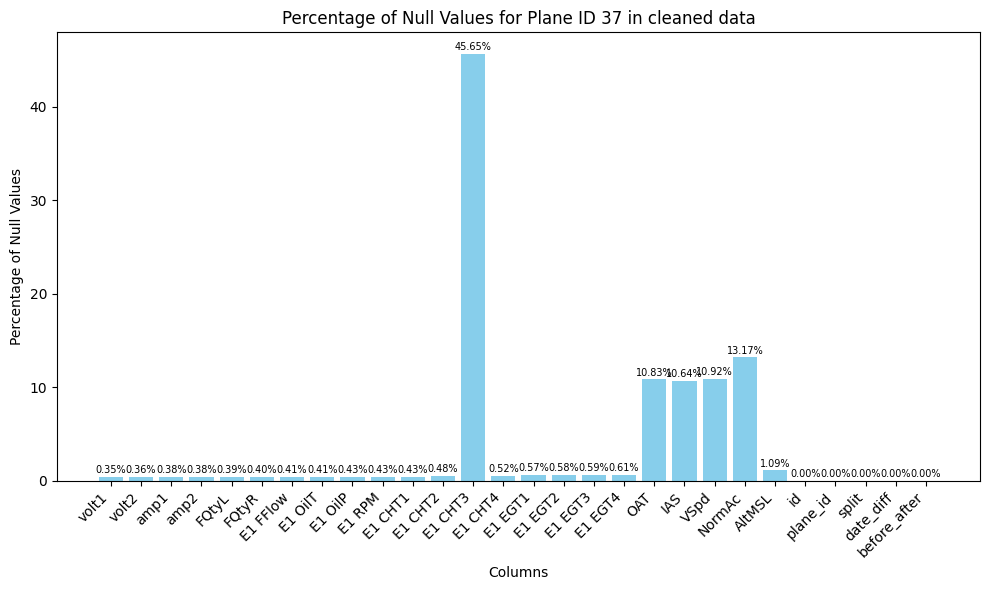

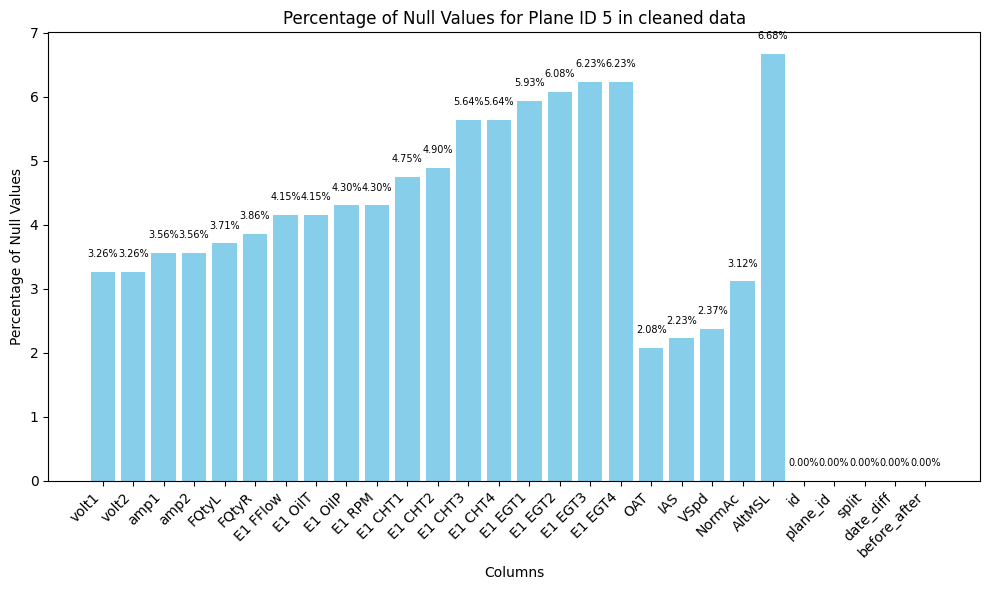

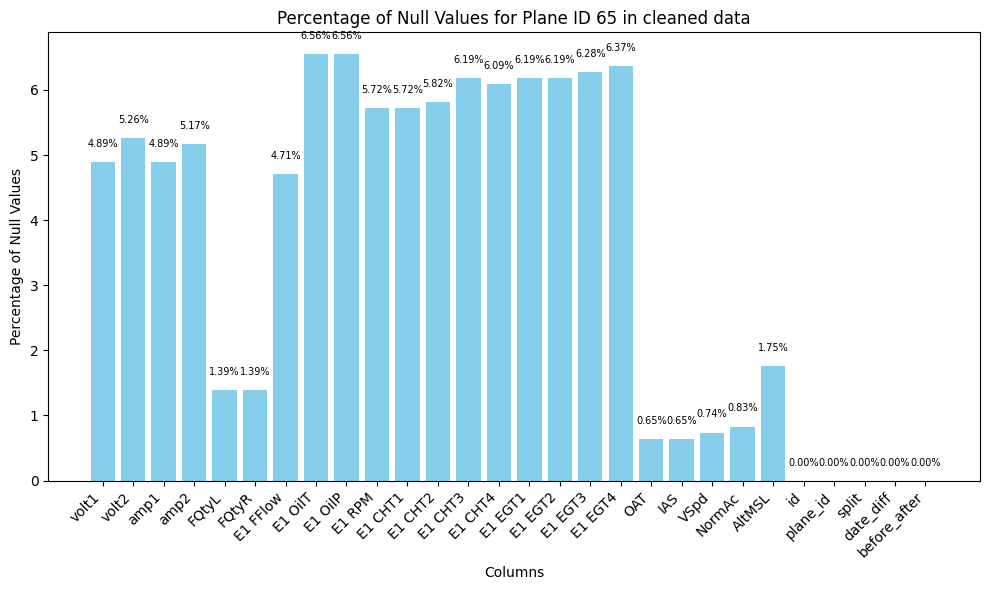

Plane ID 39 does not sum up to 100%
100.00000000000001


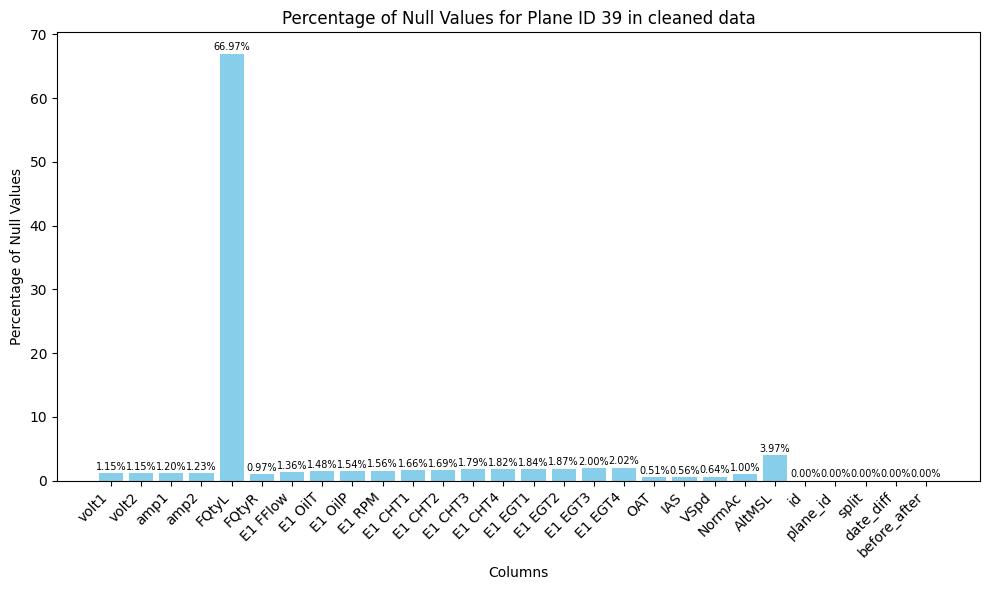

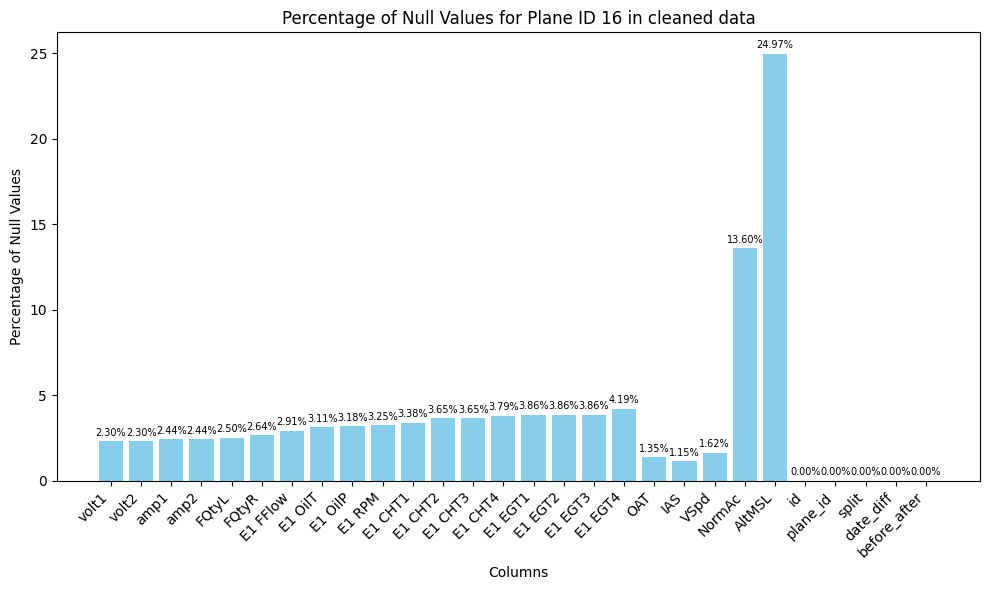

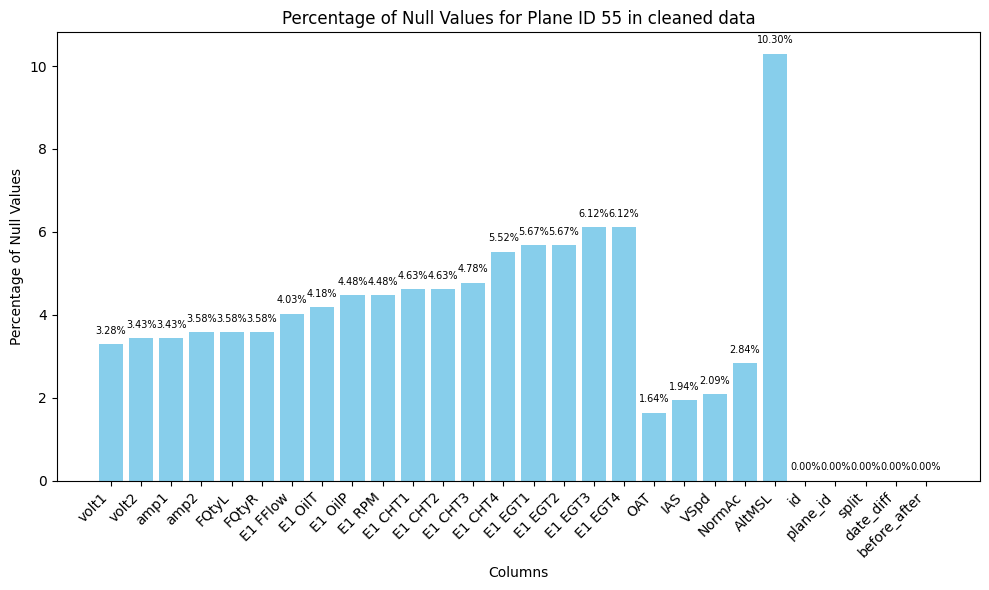

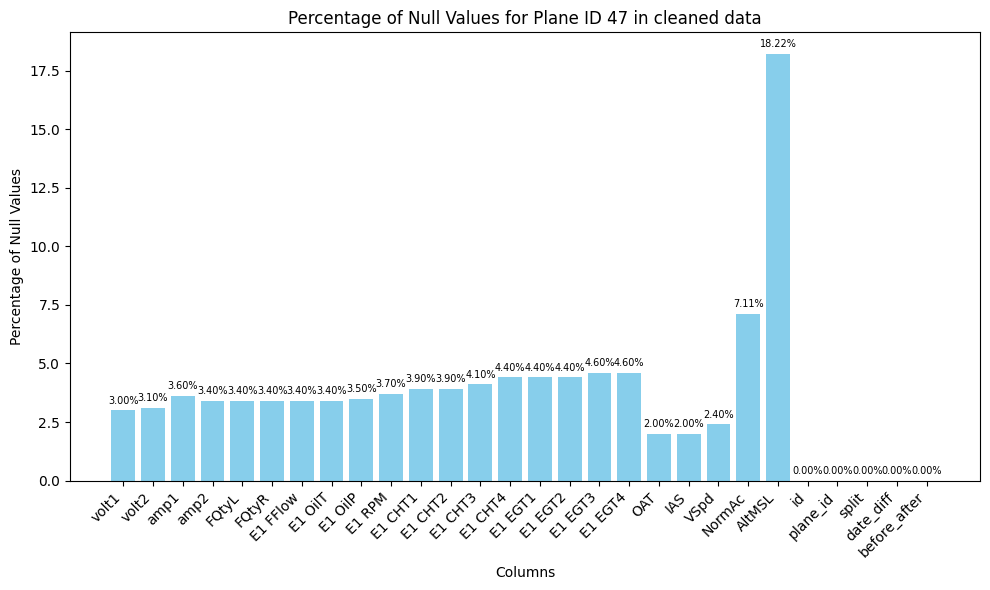

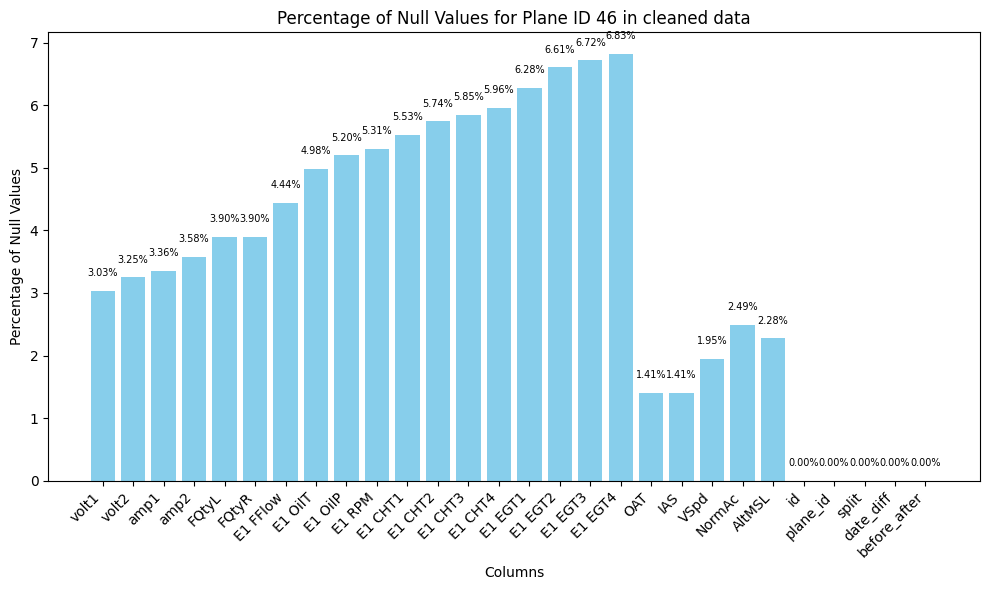

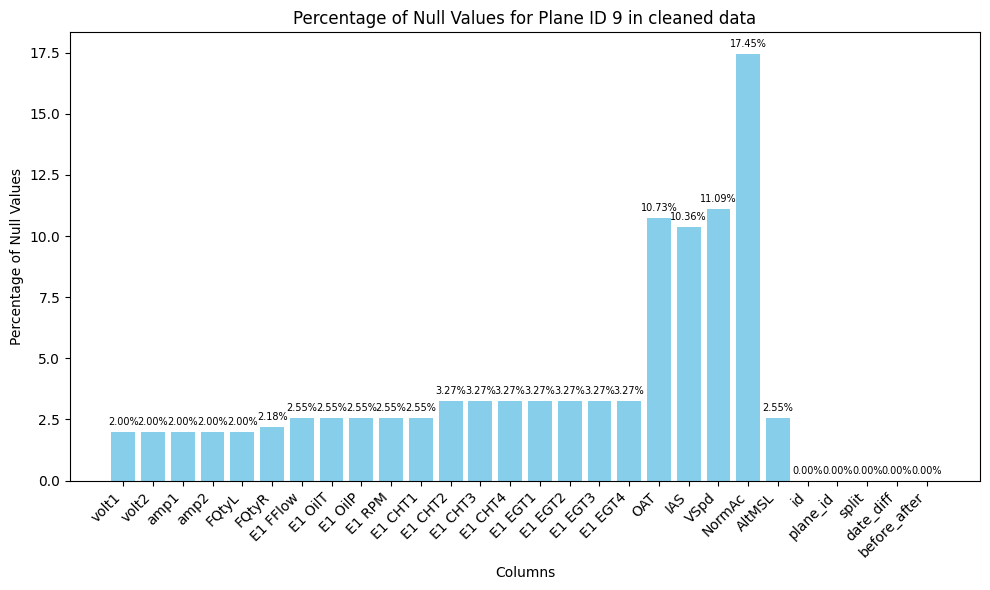

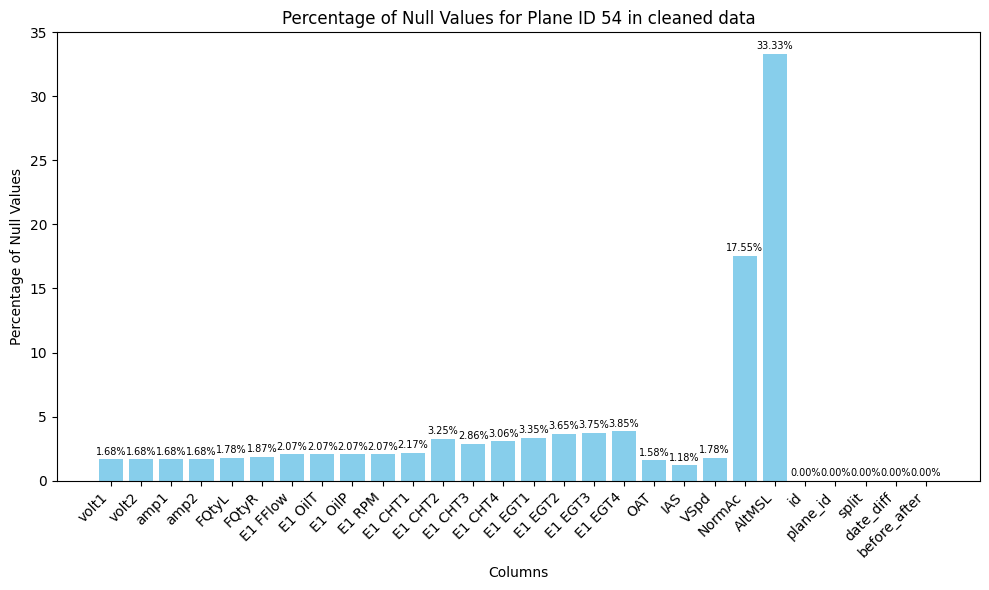

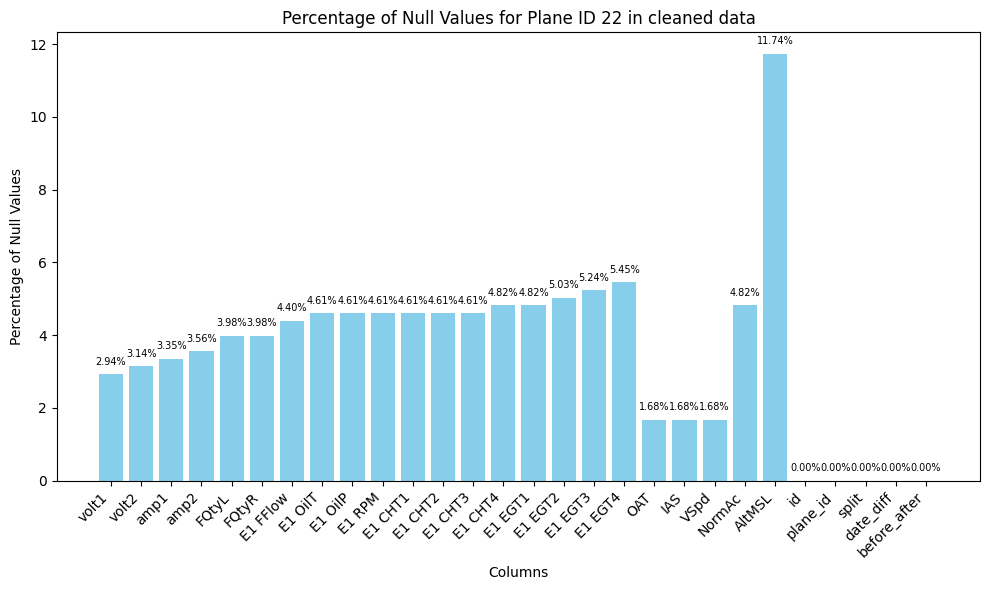

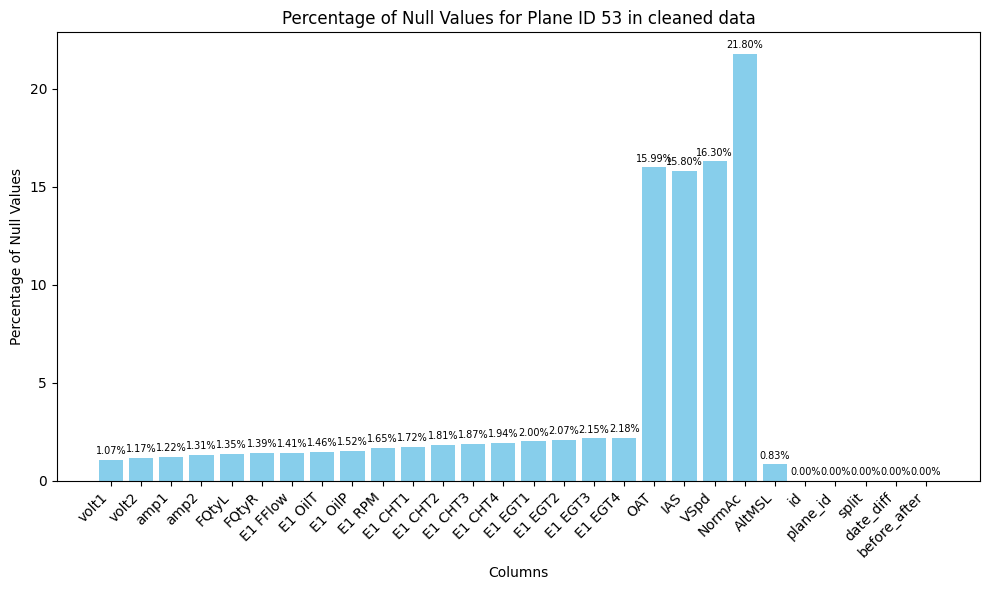

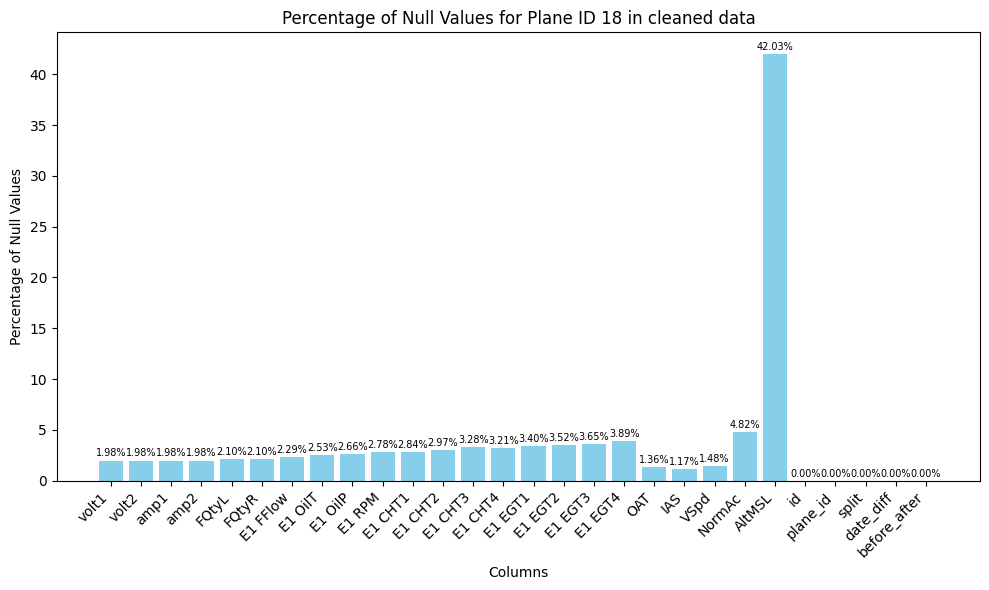

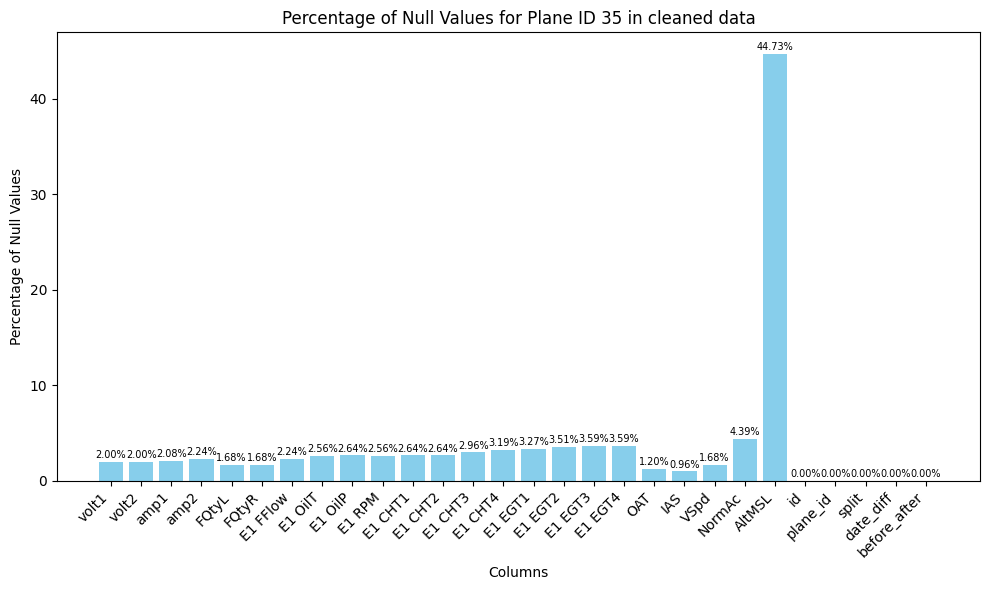

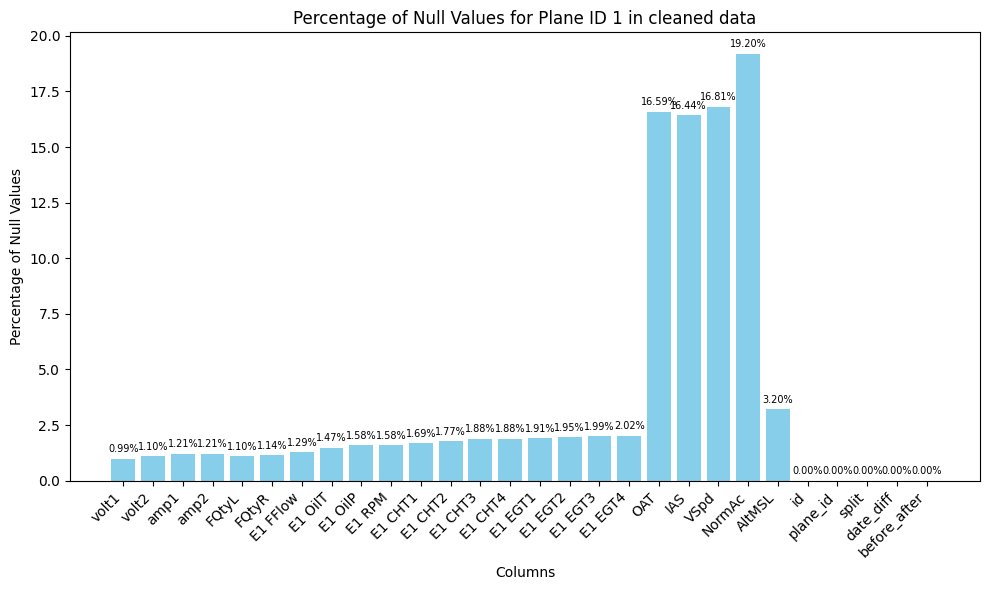

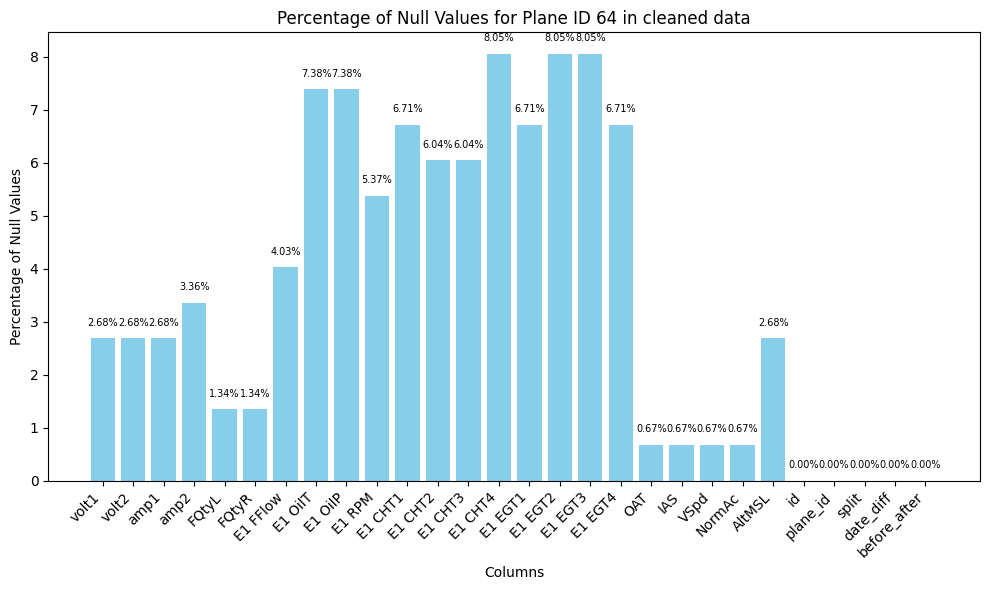

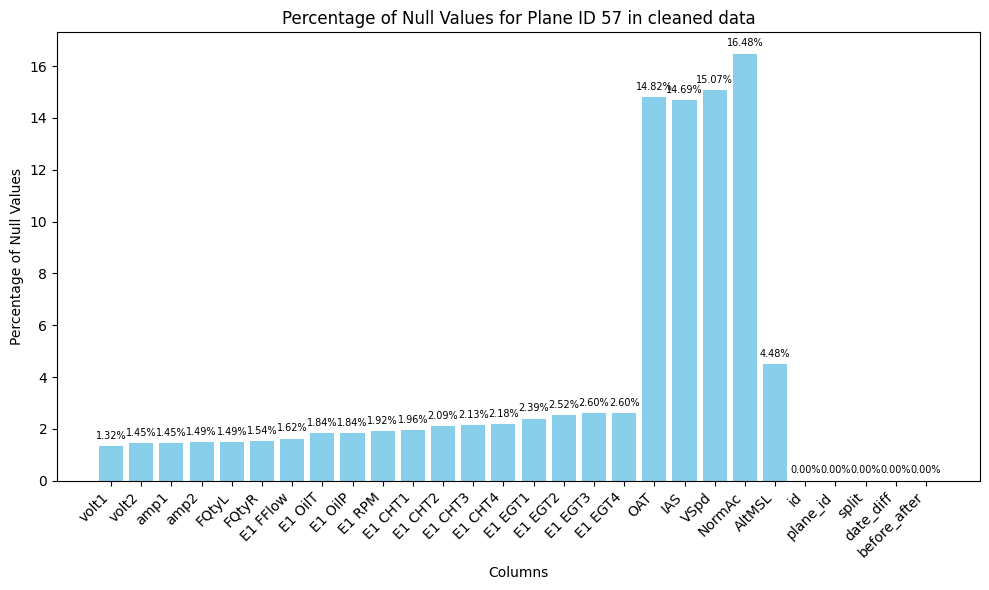

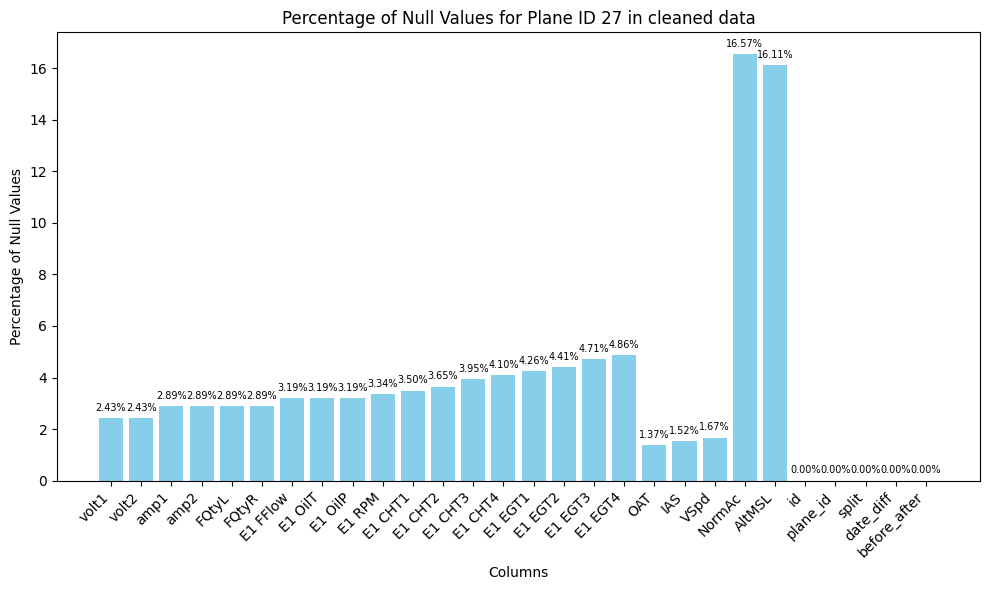

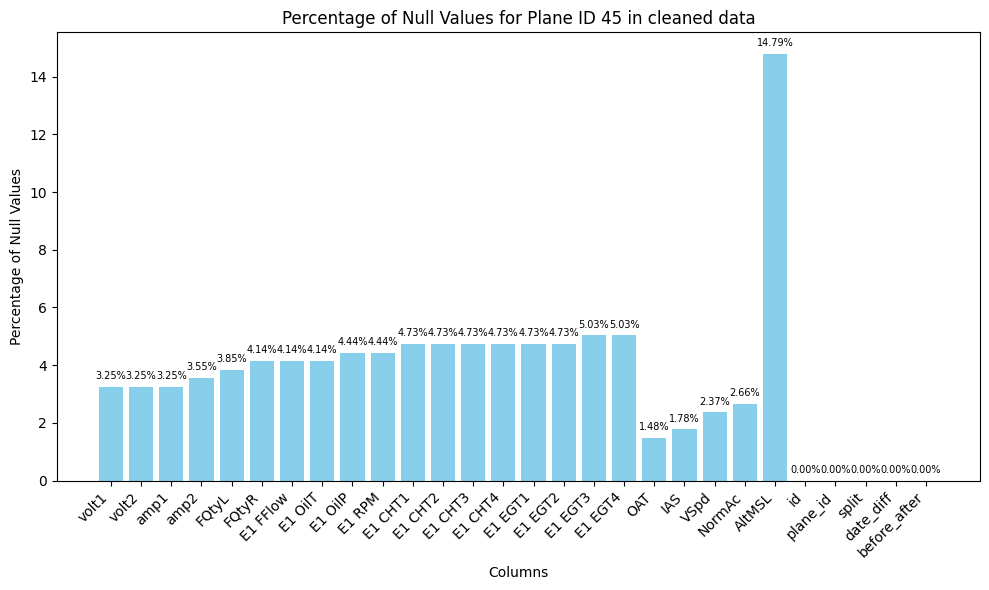

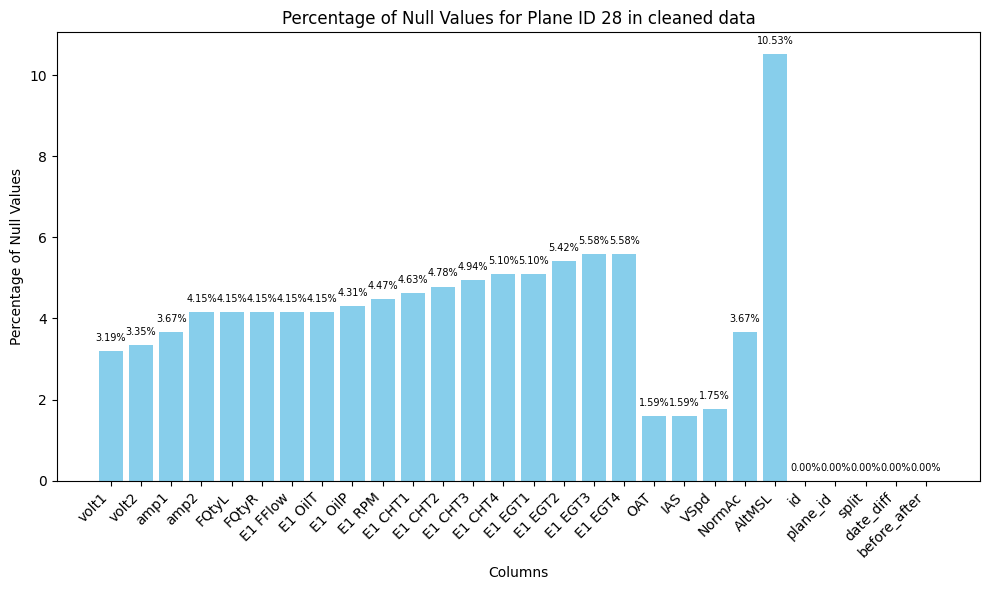

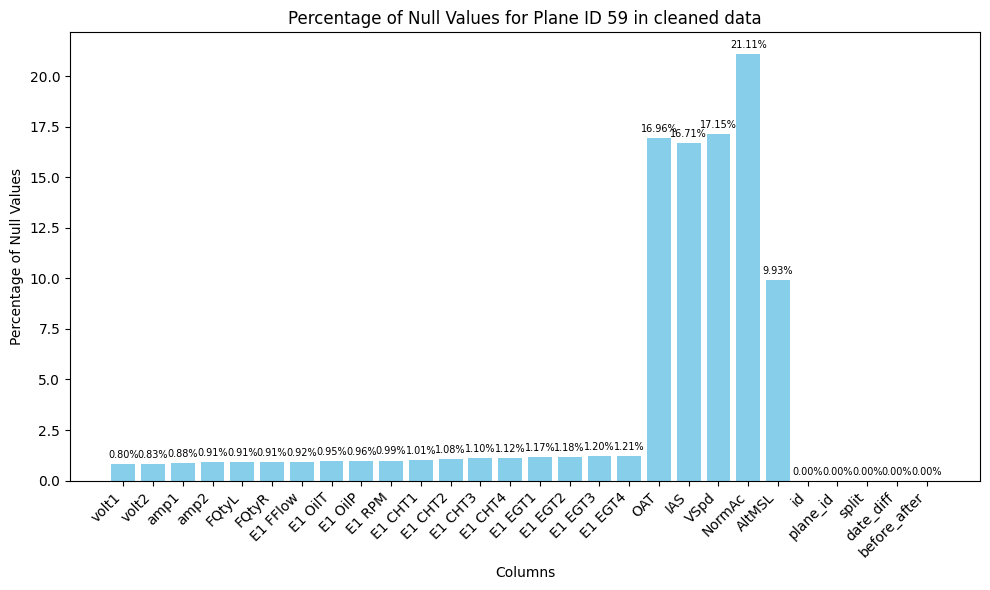

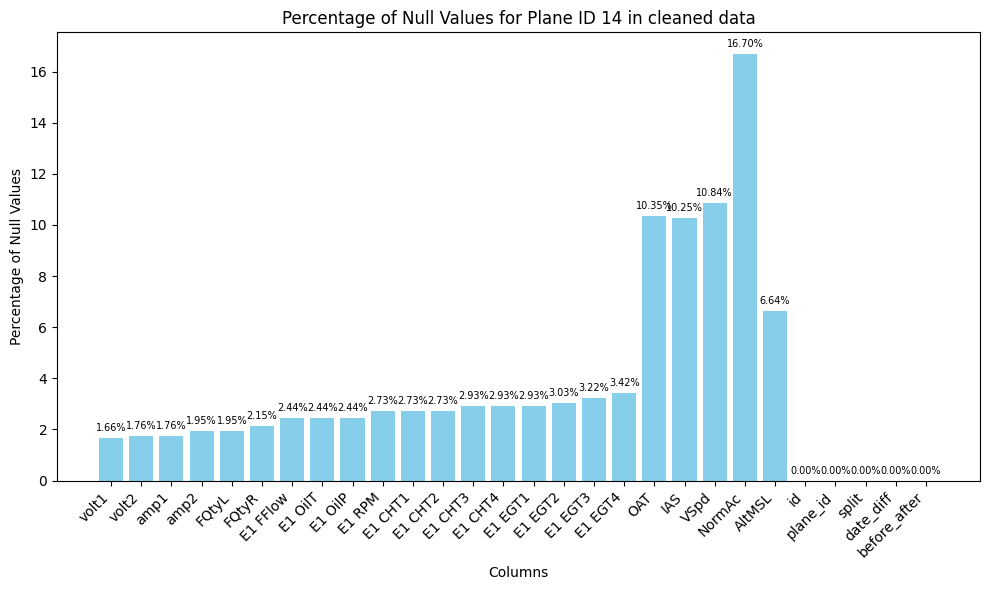

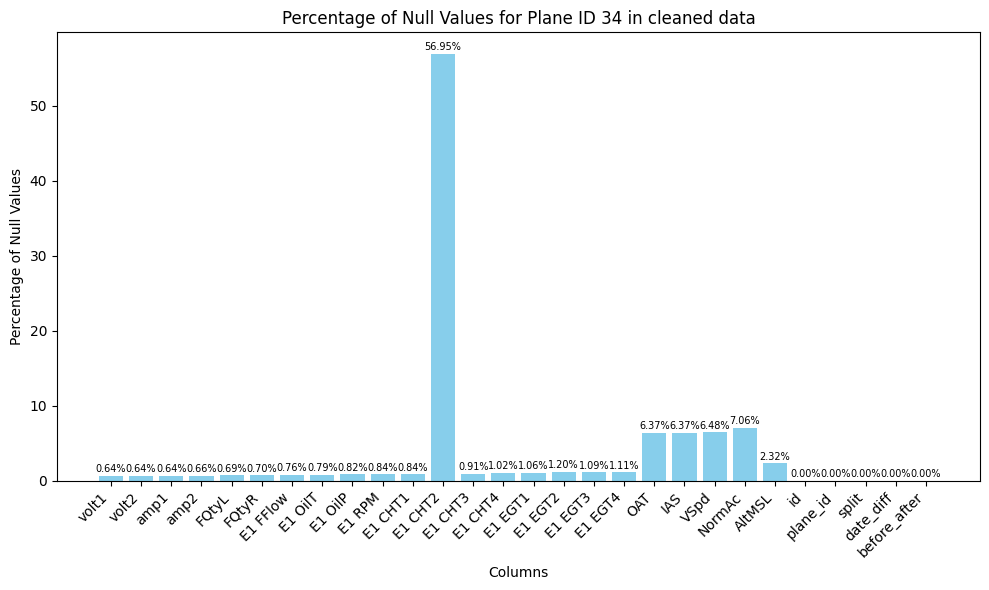

Plane ID 21 does not sum up to 100%
99.99999999999999


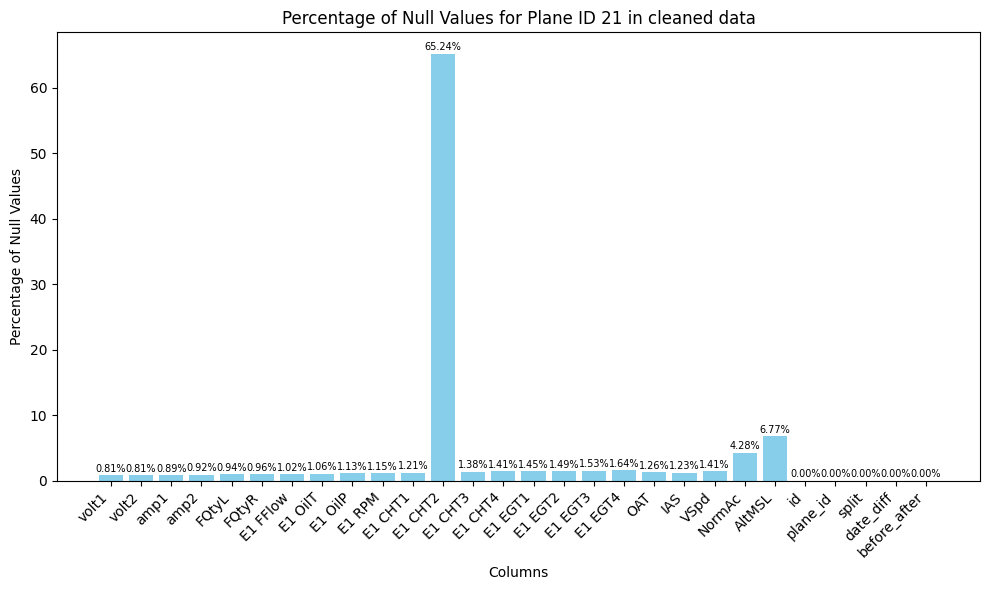

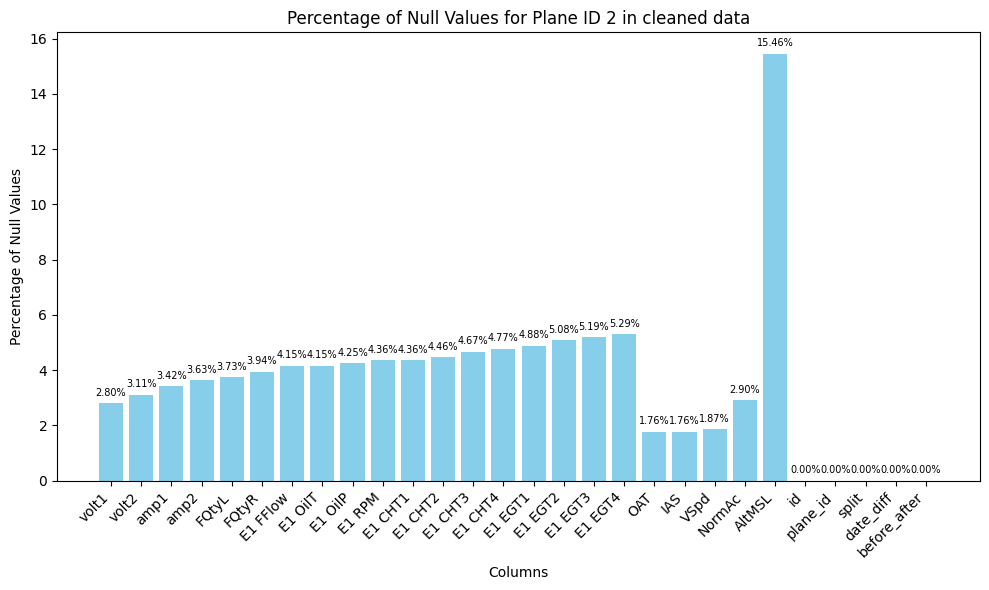

Plane ID 25 does not sum up to 100%
99.99999999999999


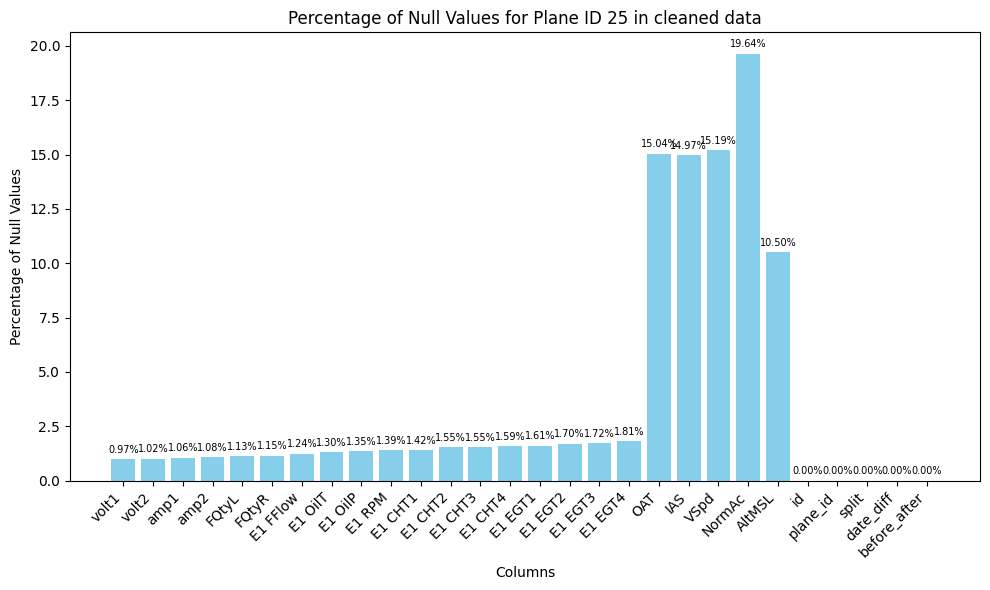

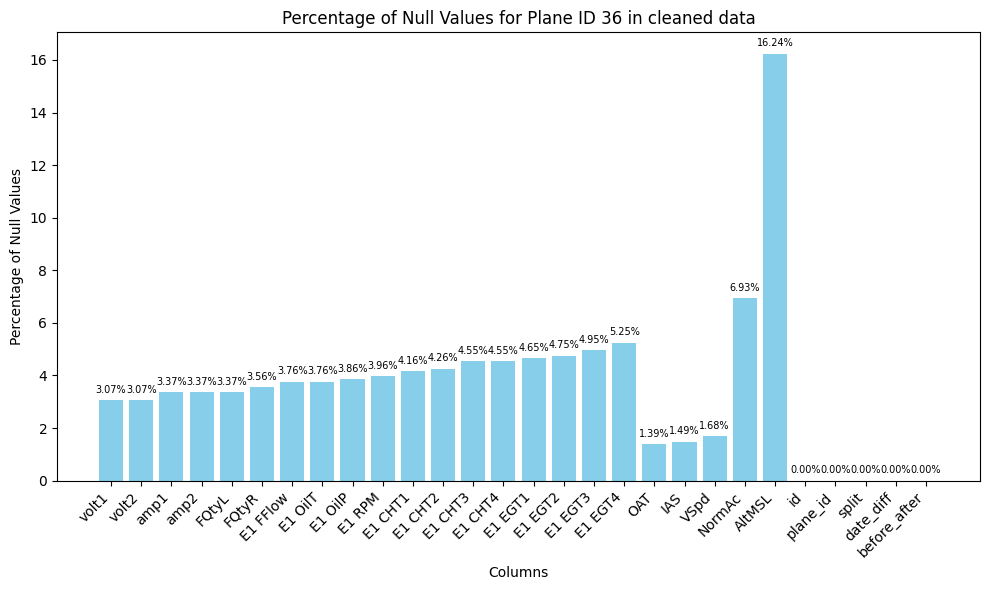

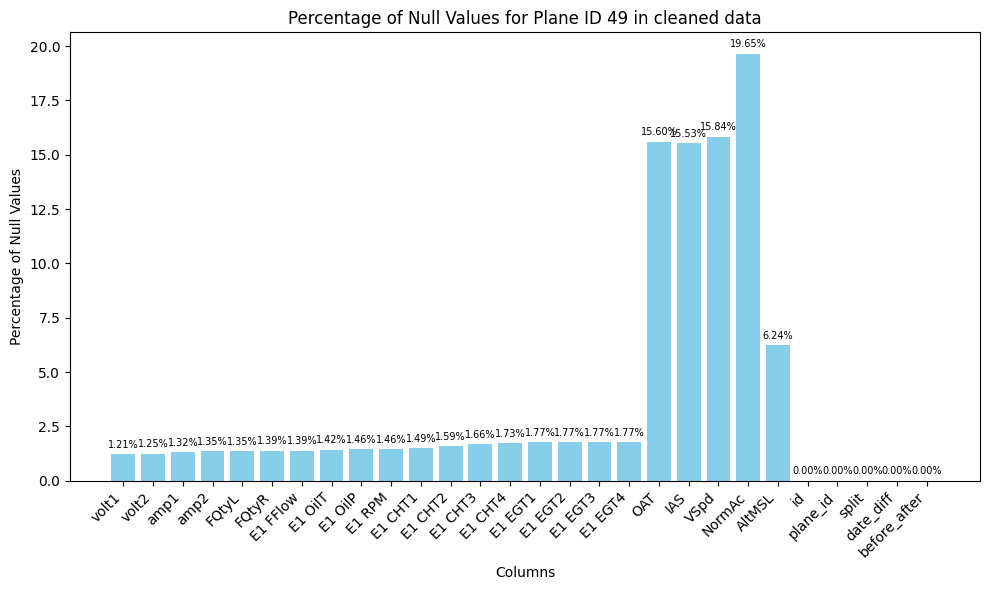

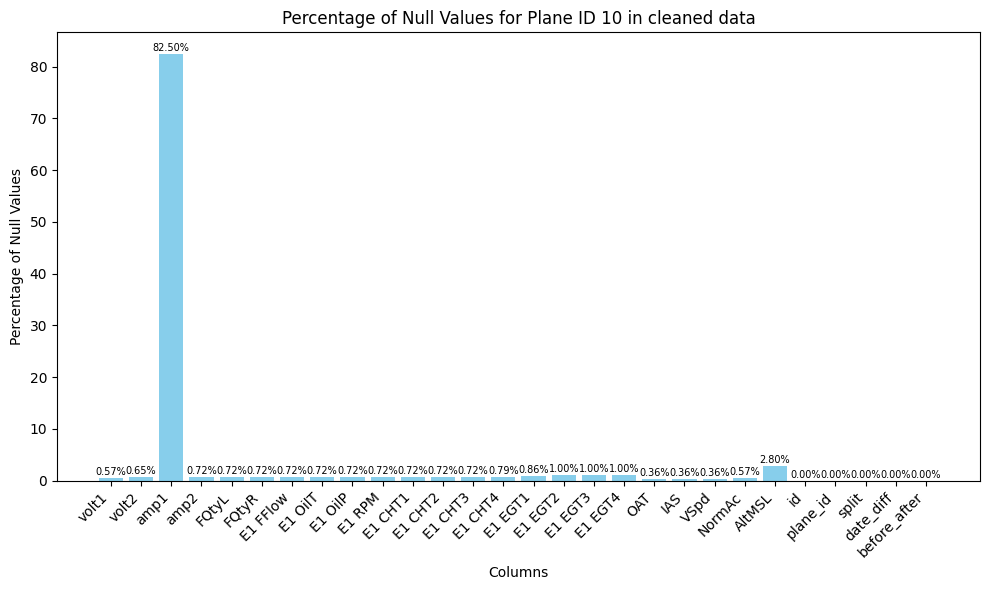

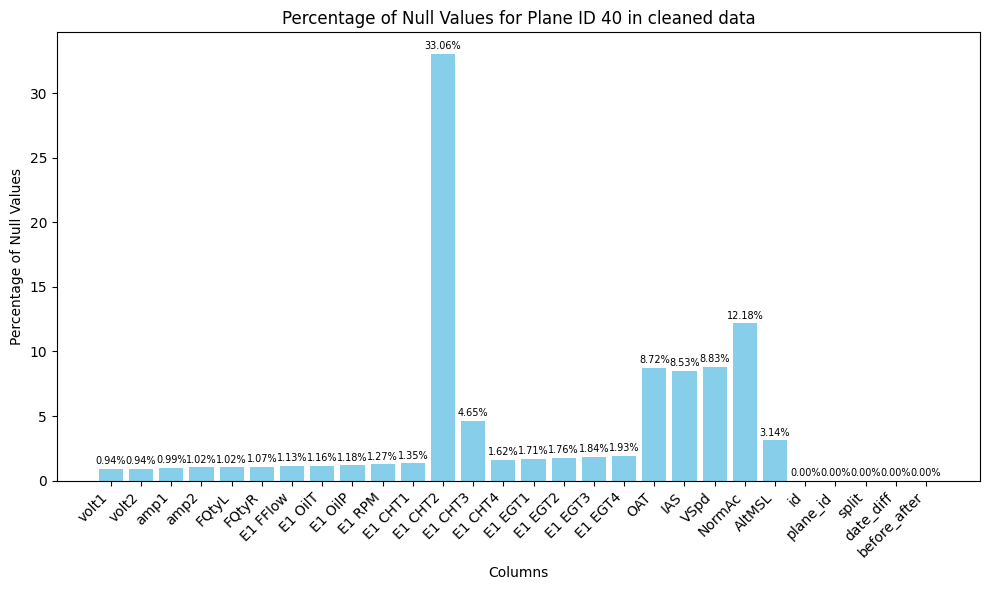

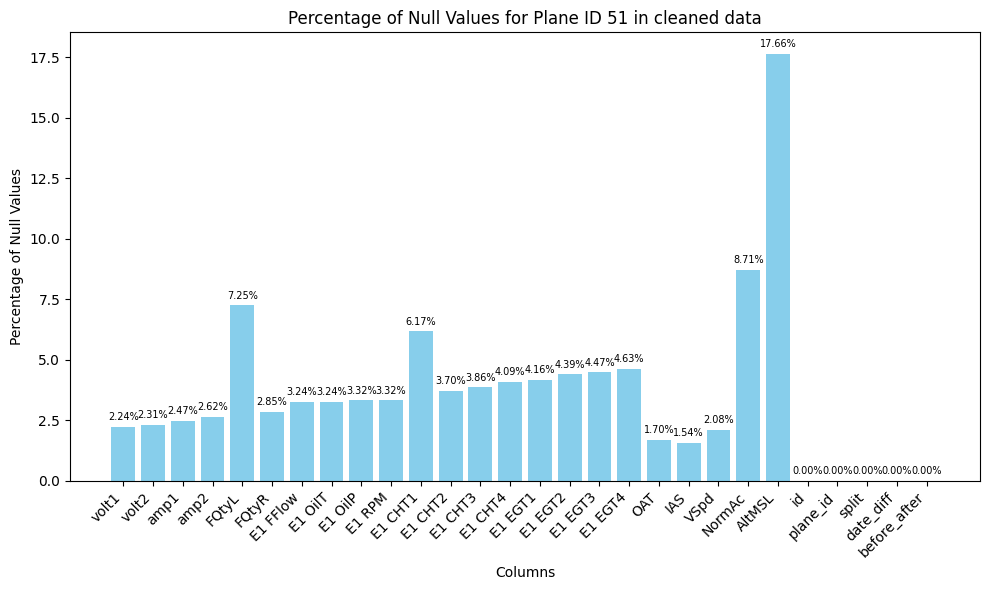

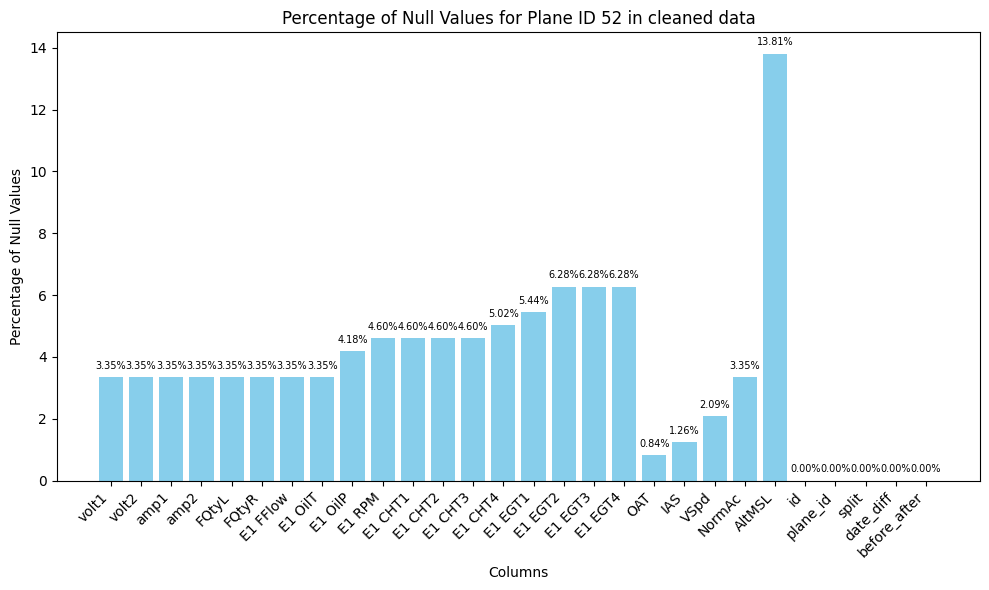

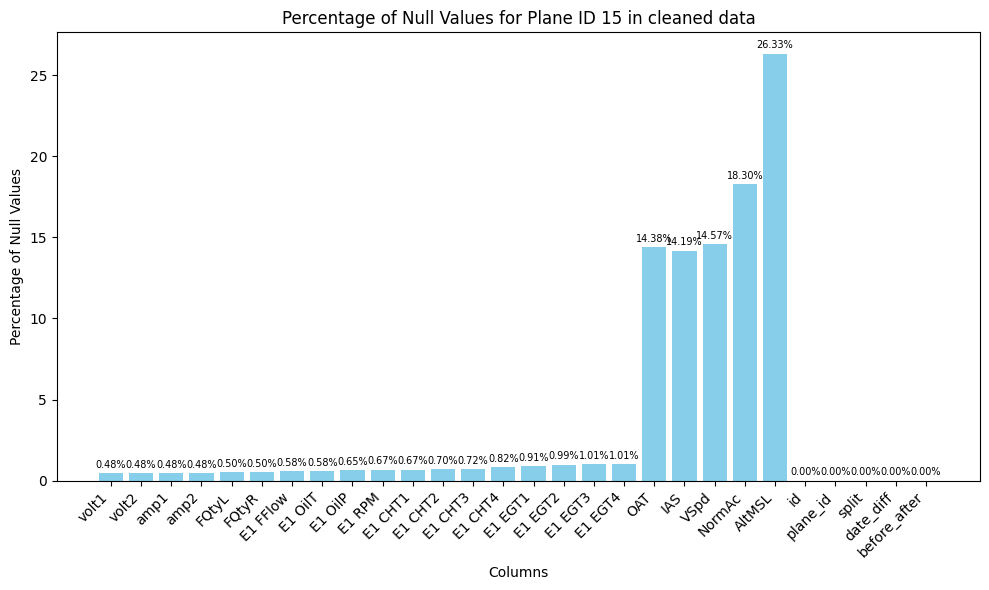

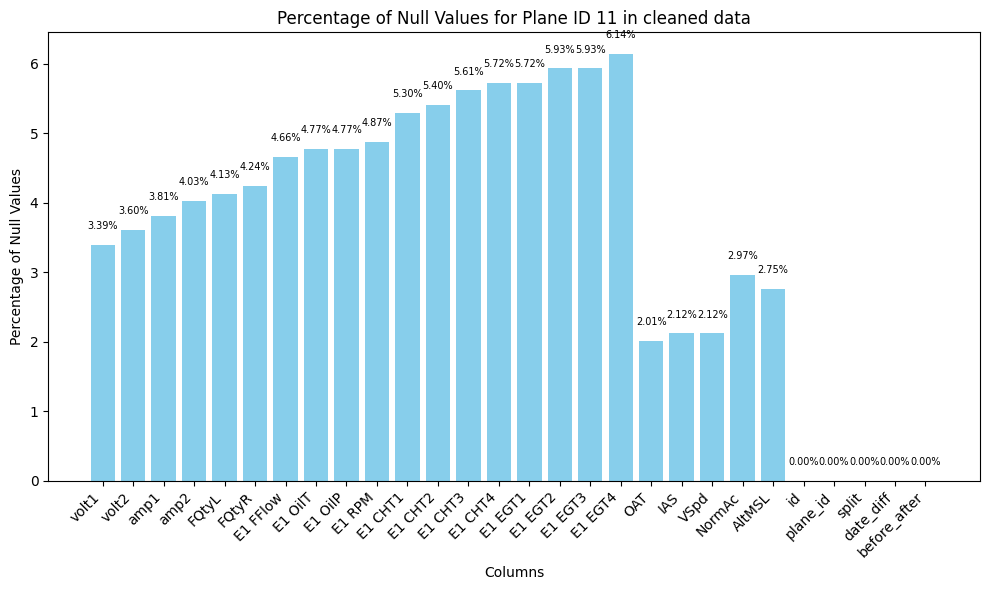

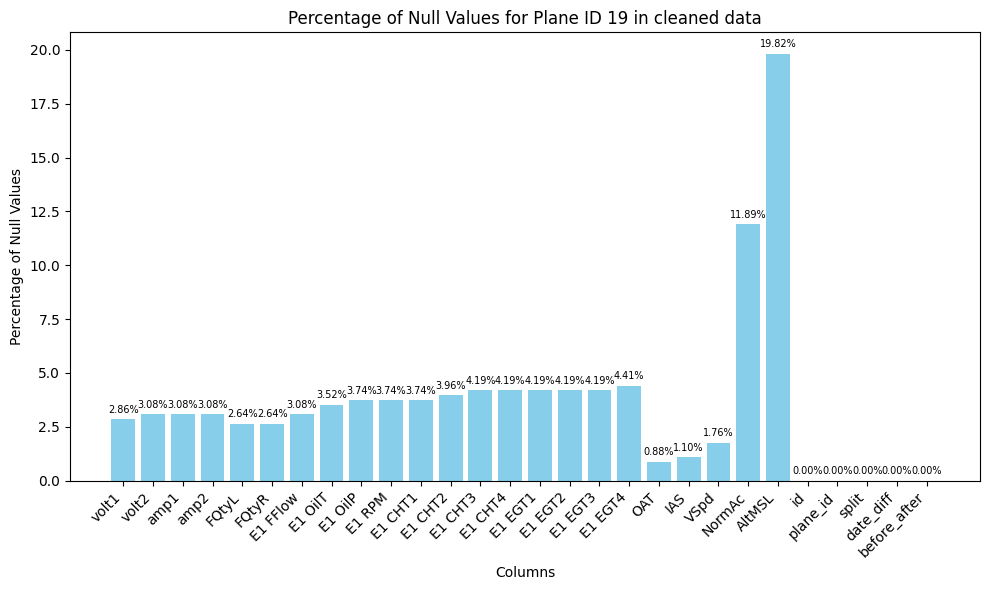

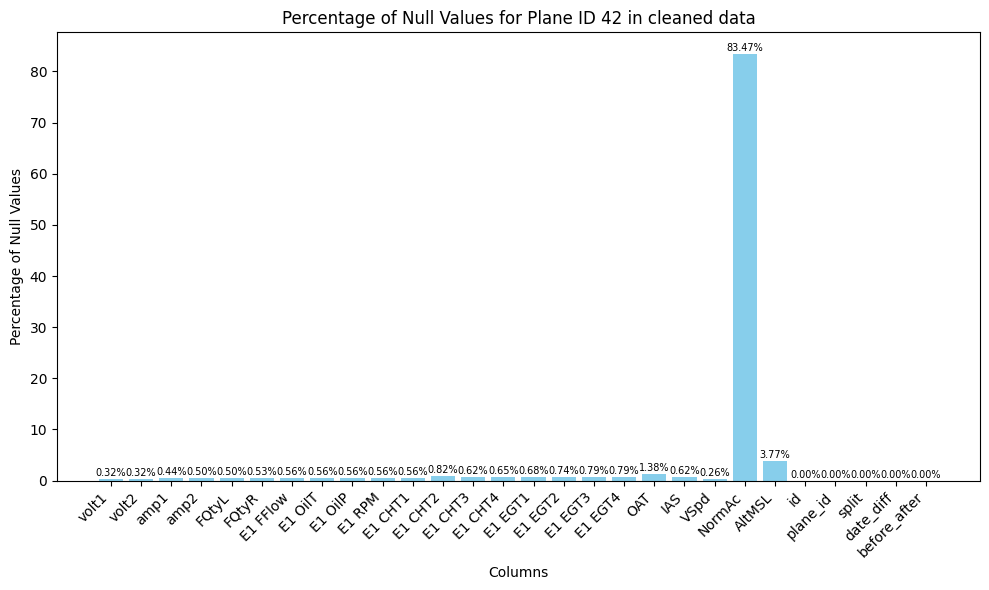

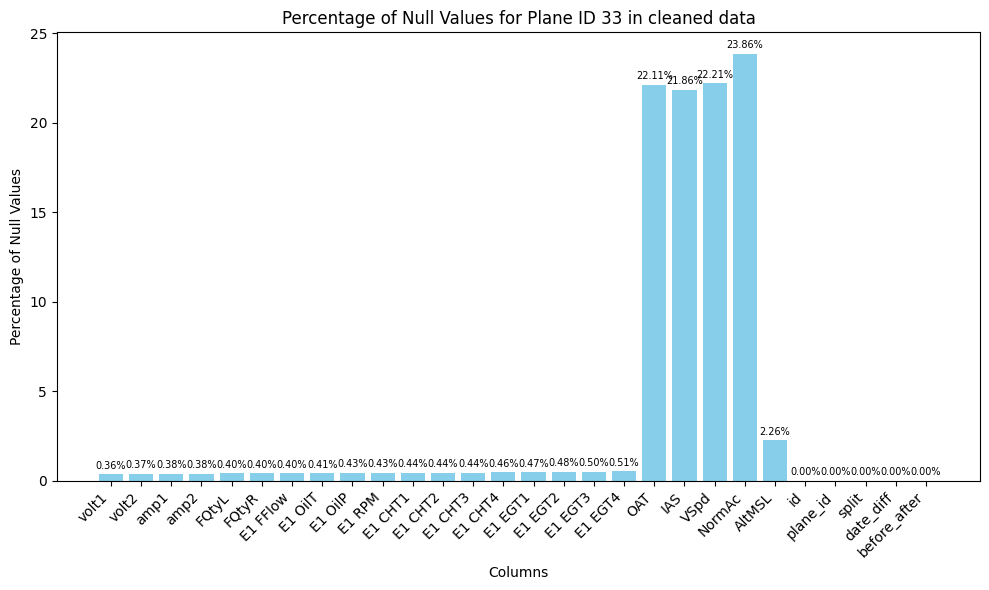

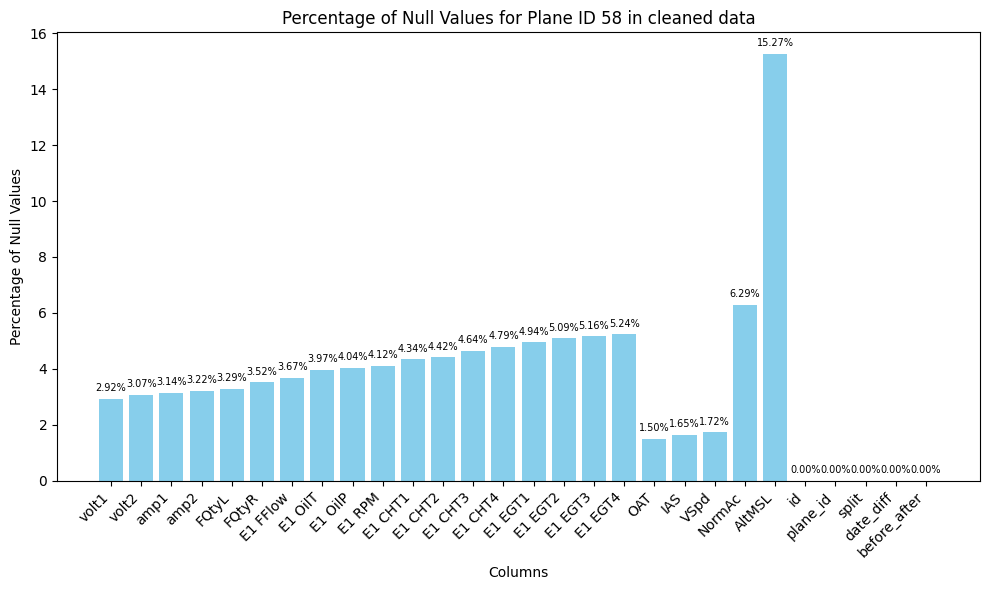

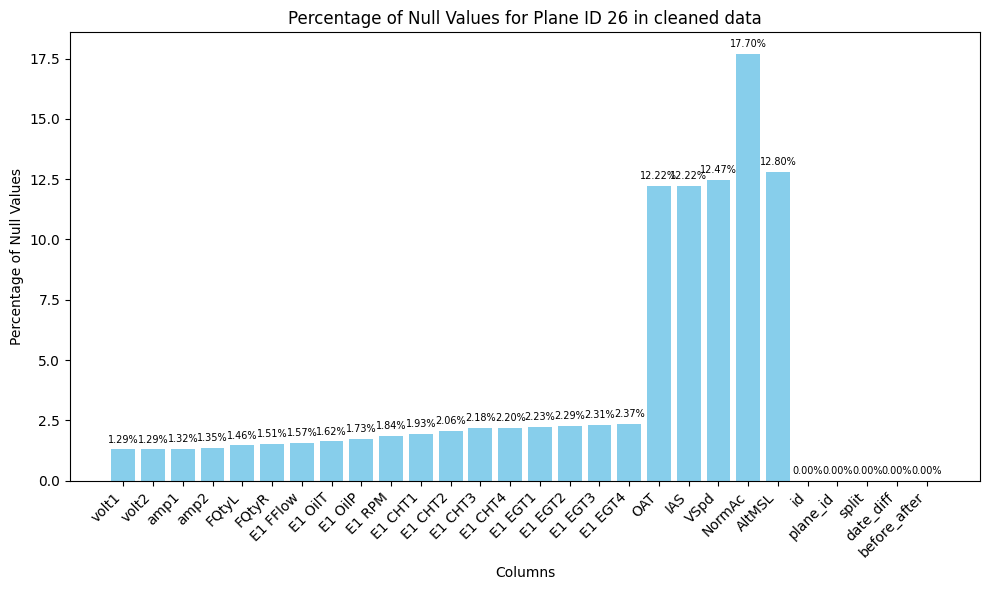

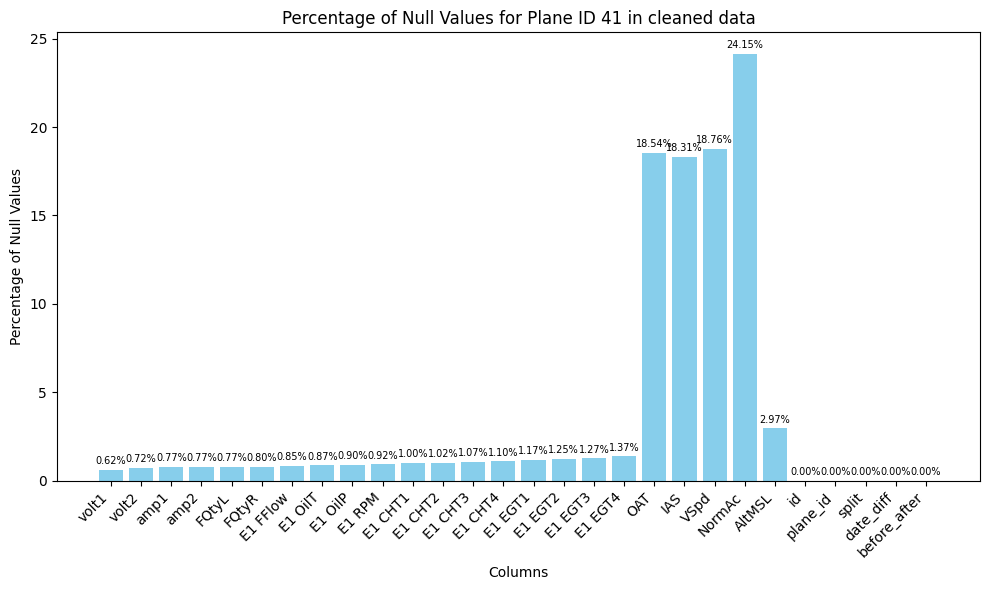

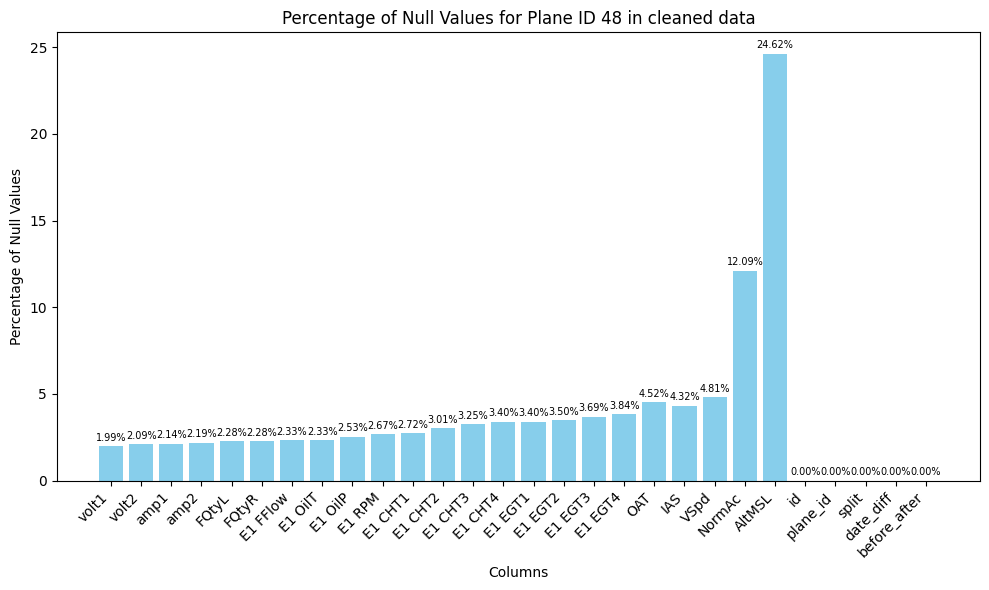

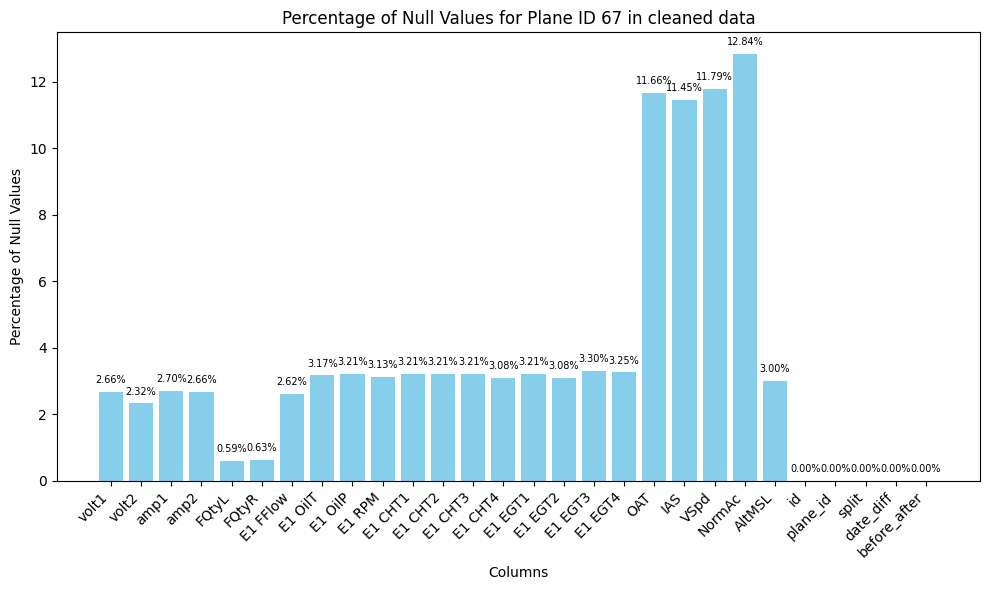

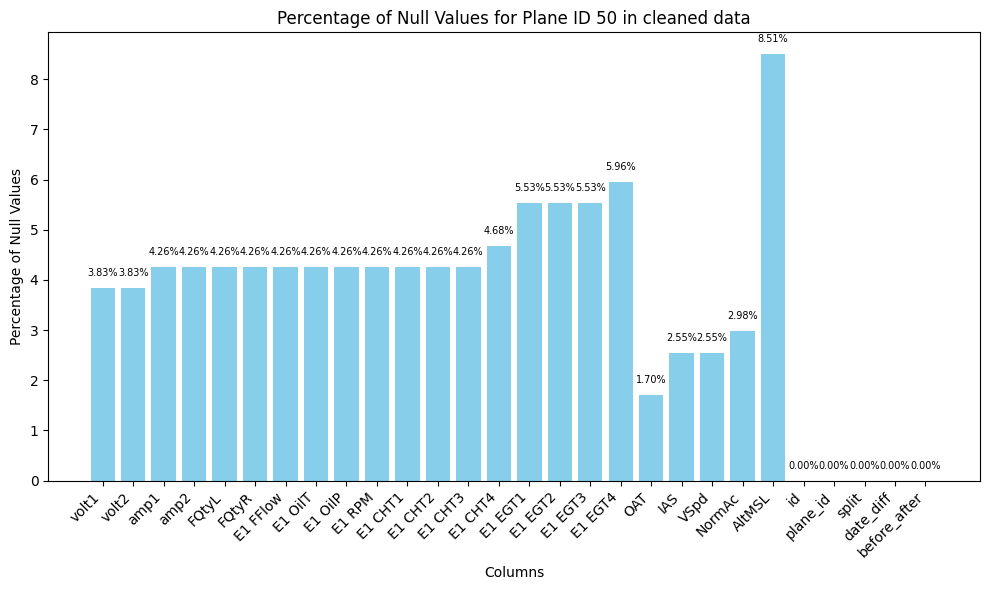

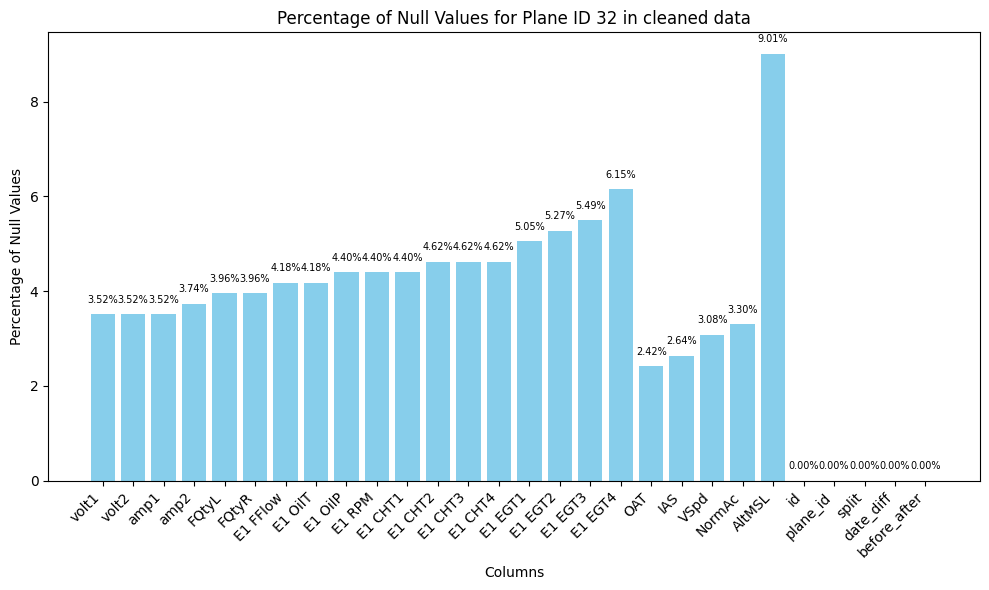

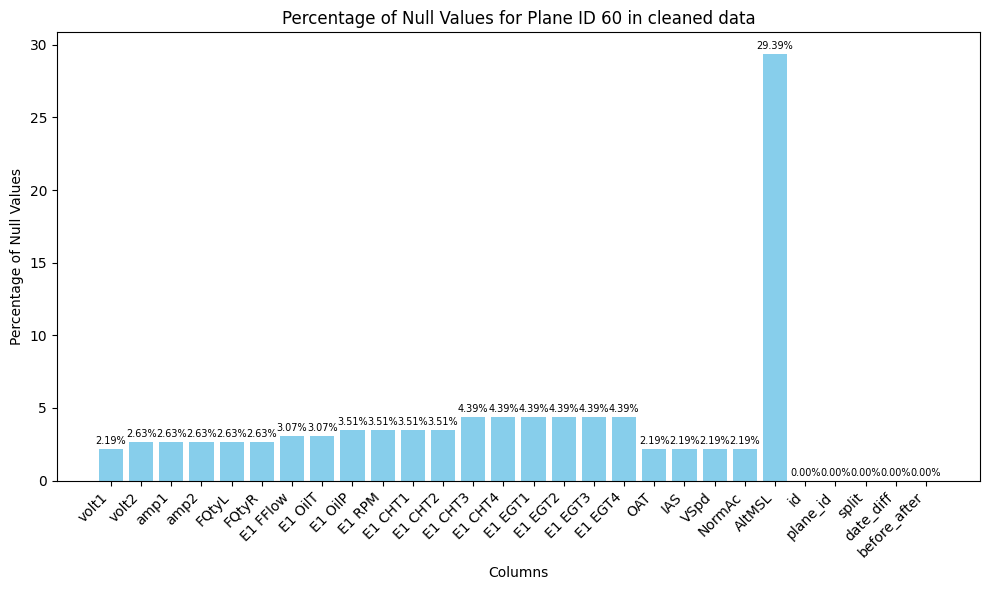

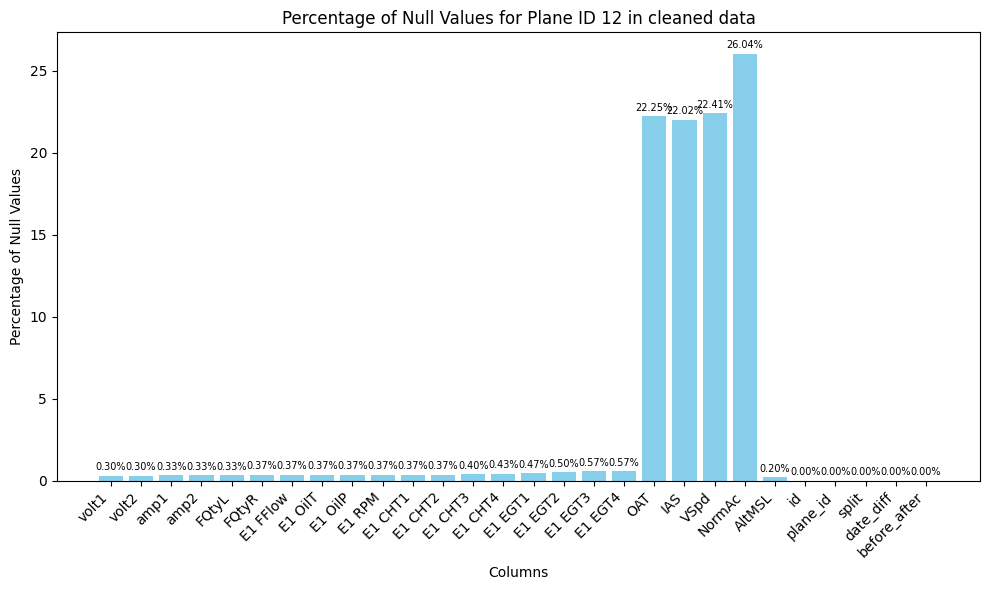

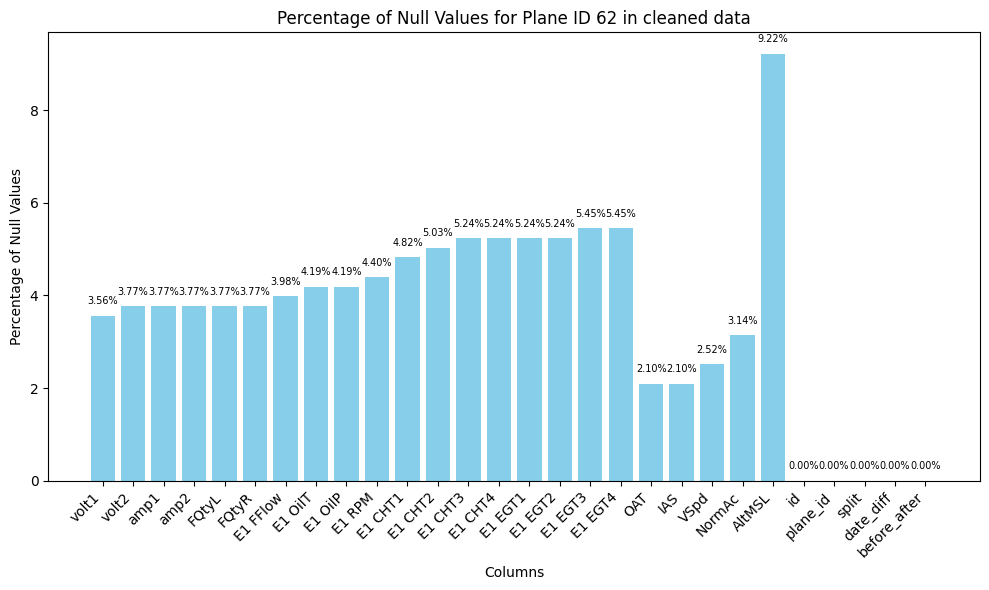

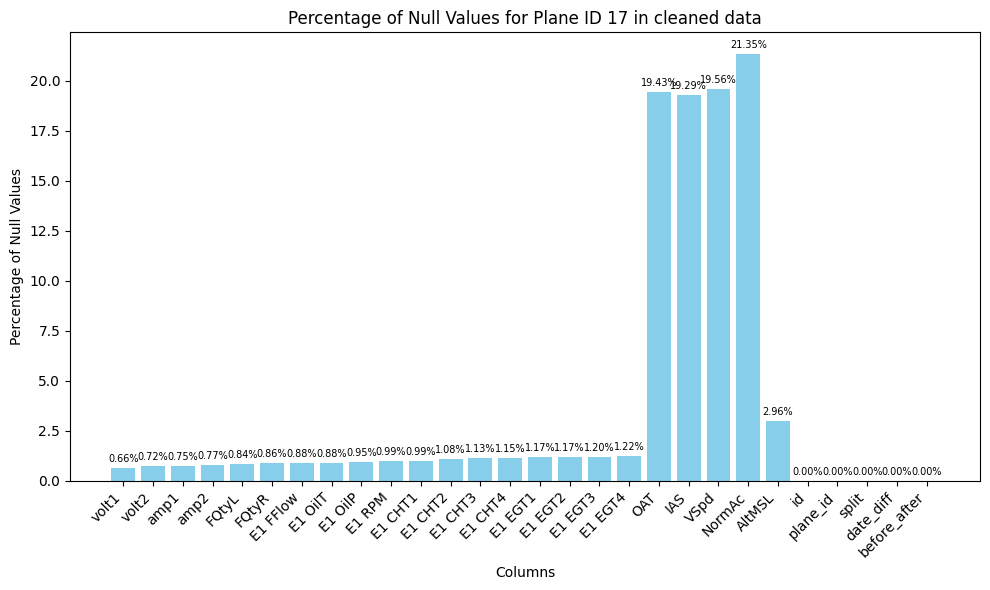

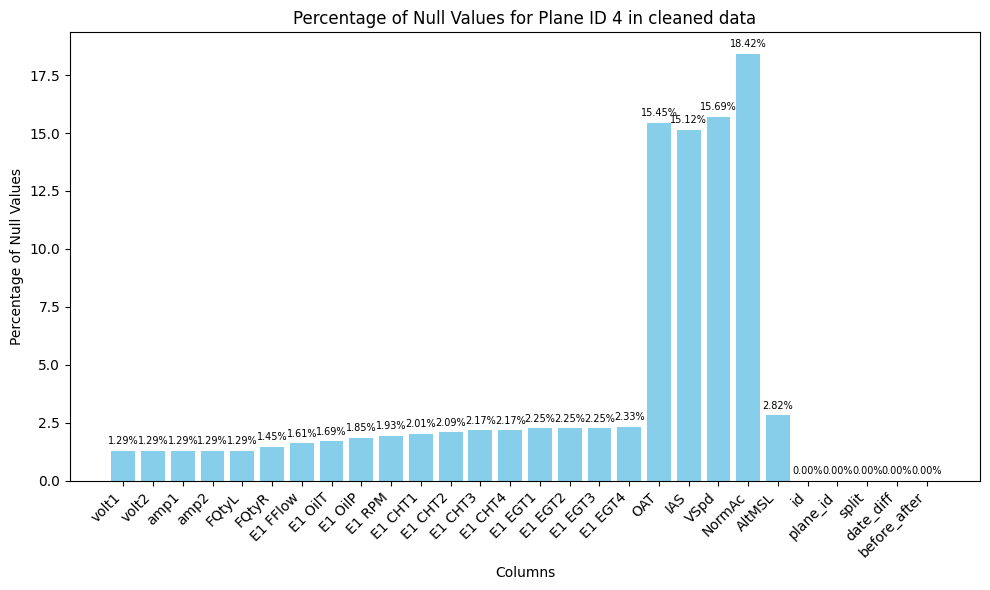

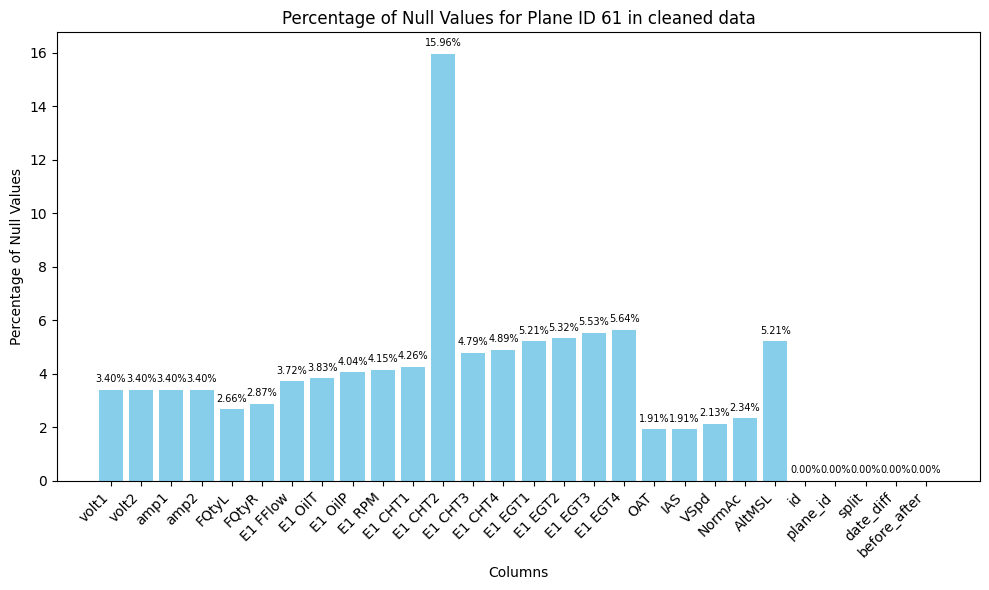

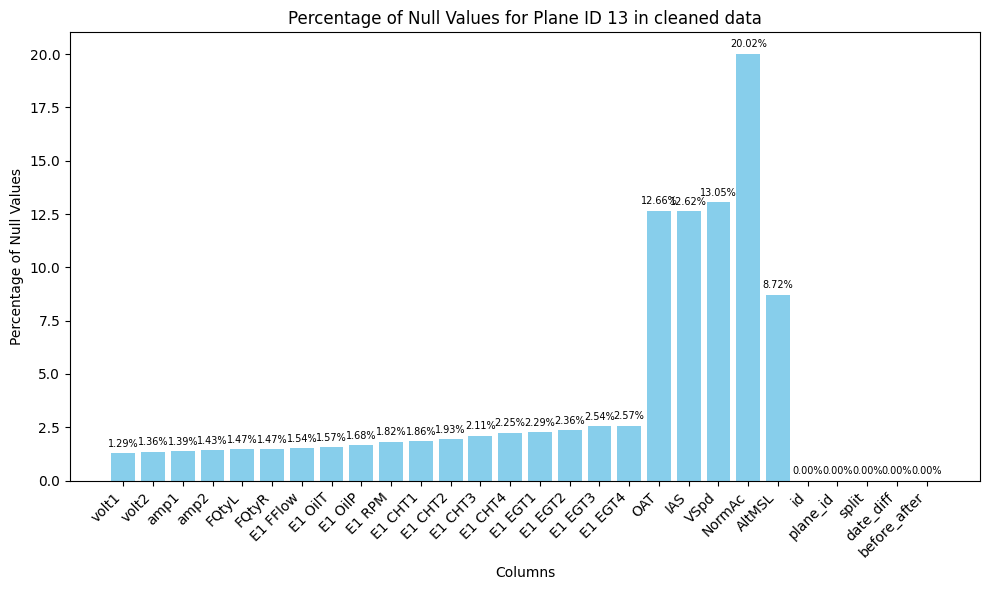

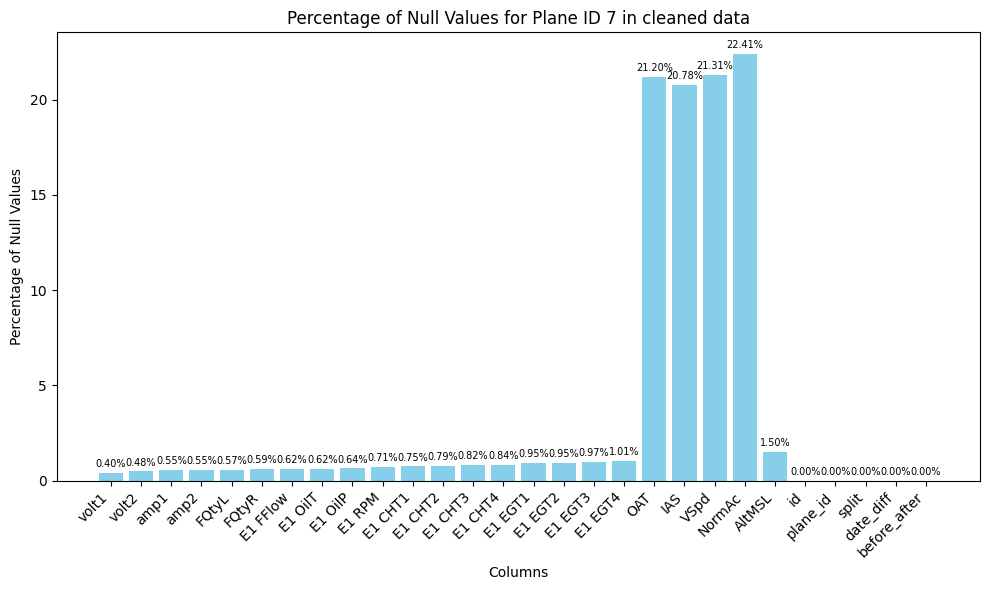

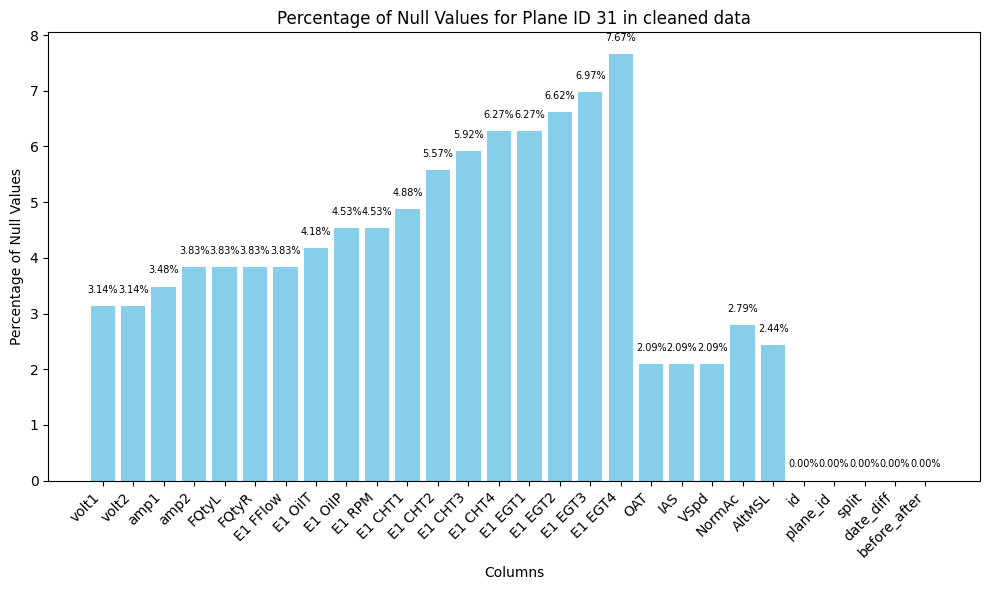

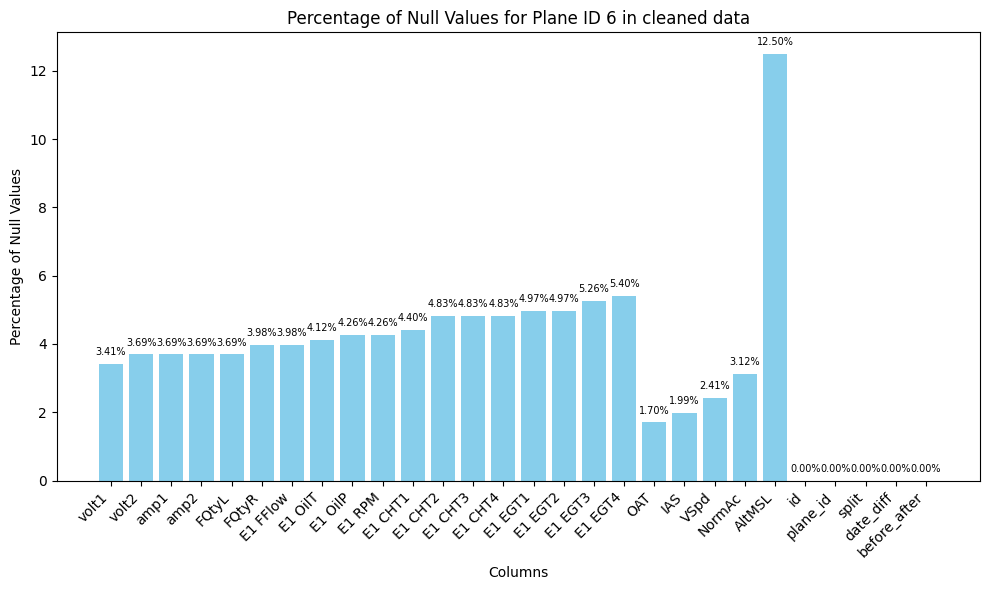

Plane ID 8 does not sum up to 100%
100.00000000000001


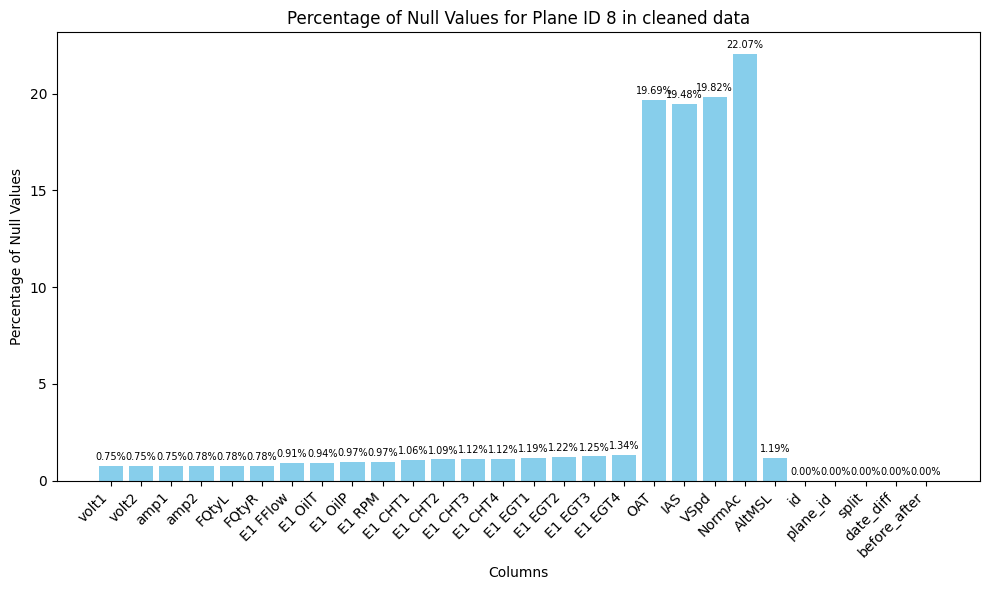

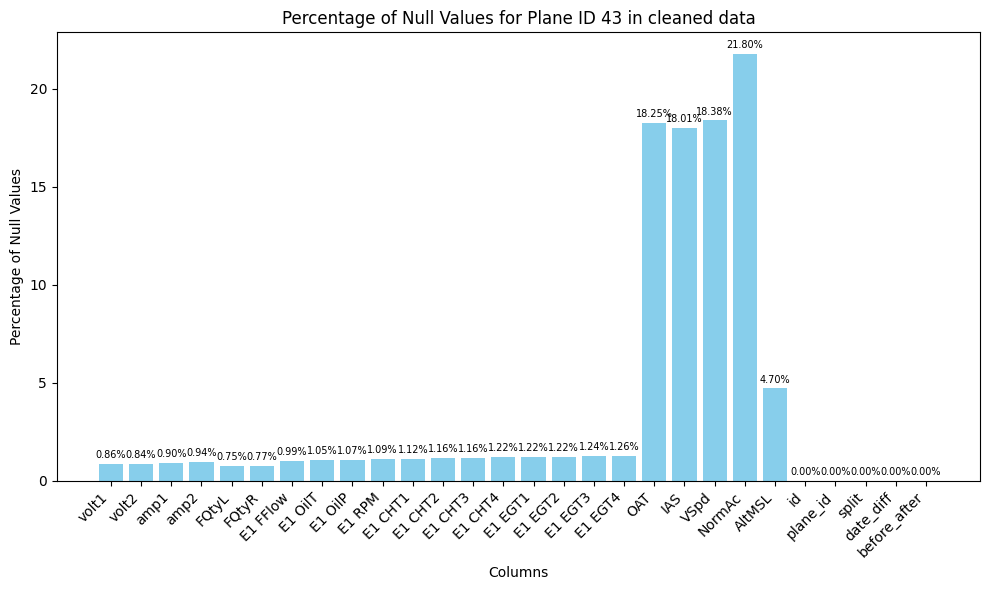

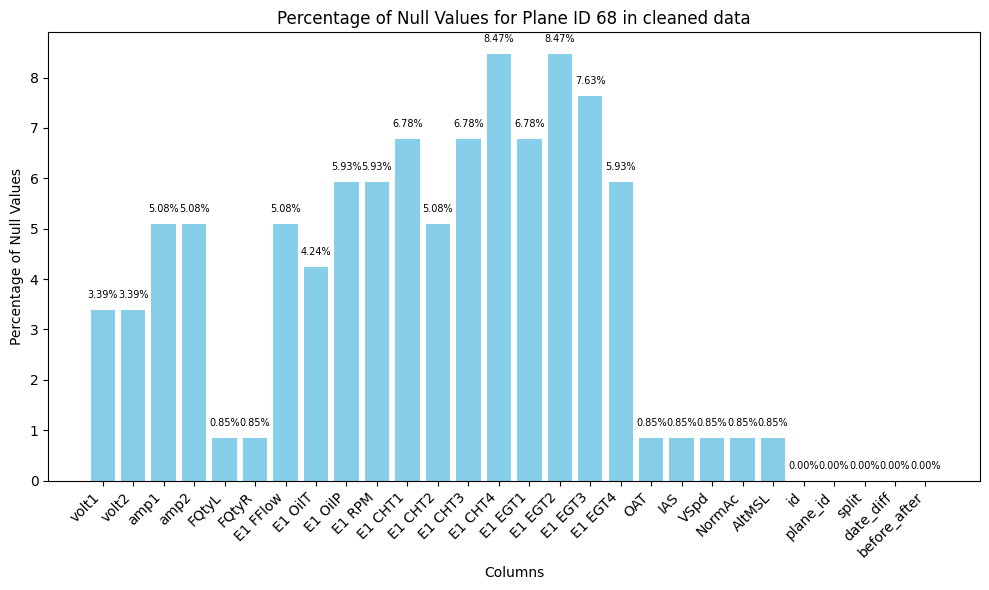

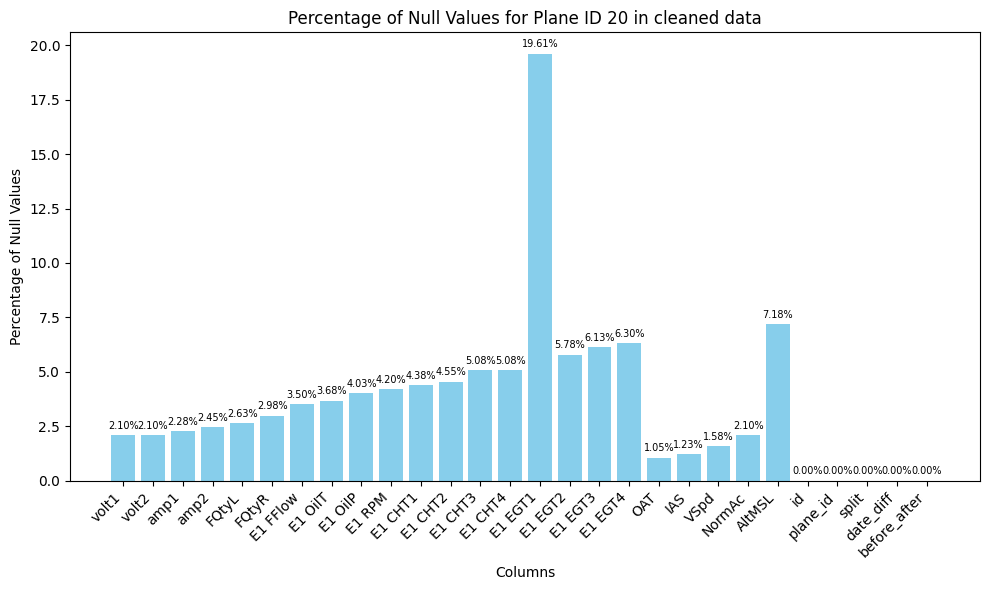

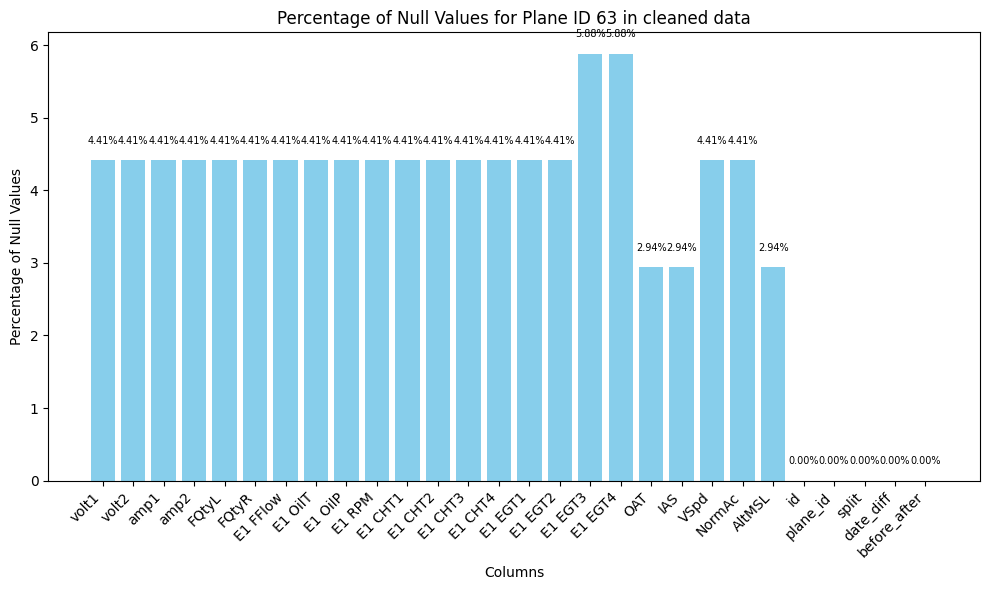

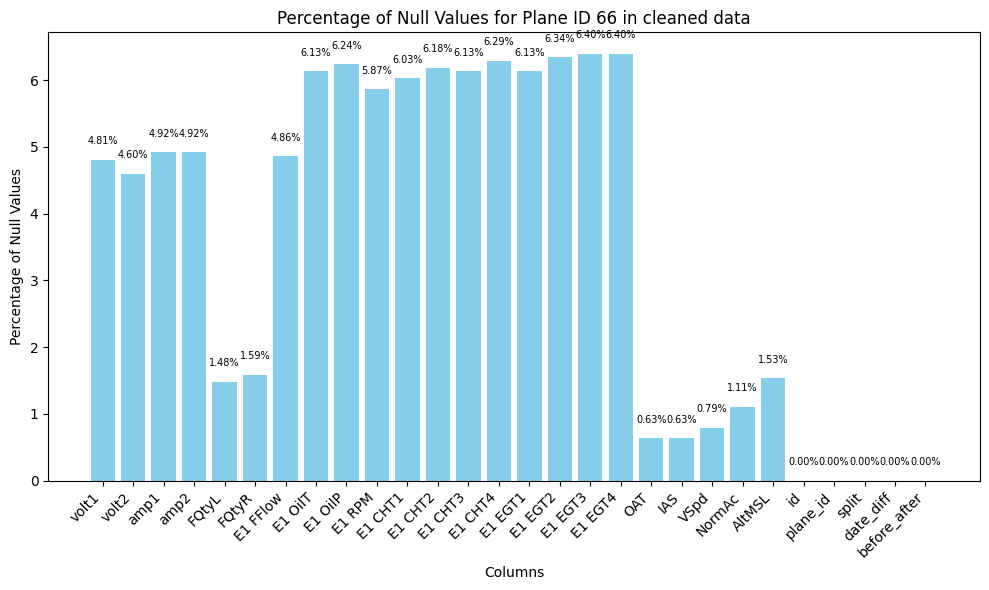

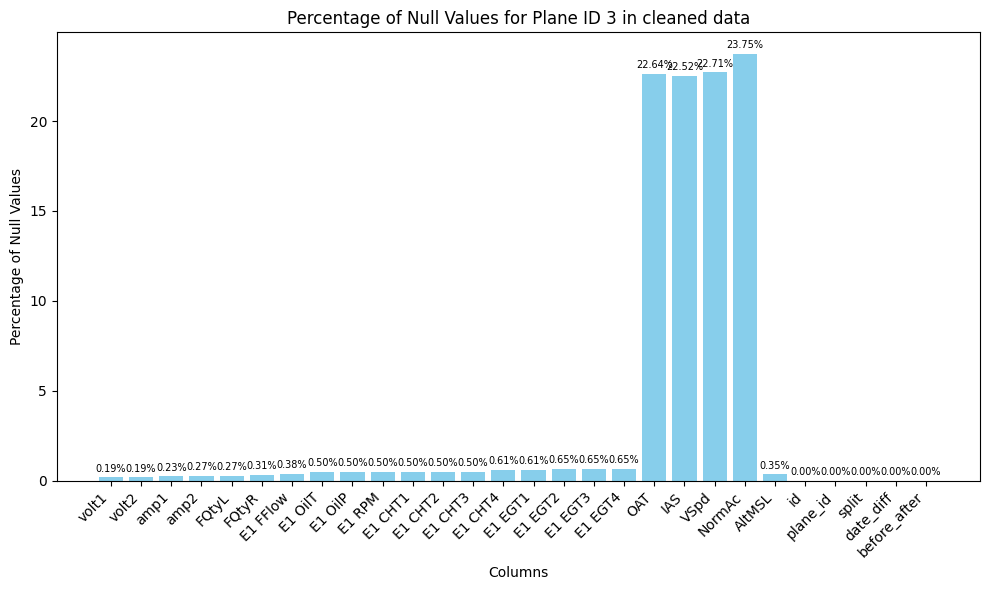

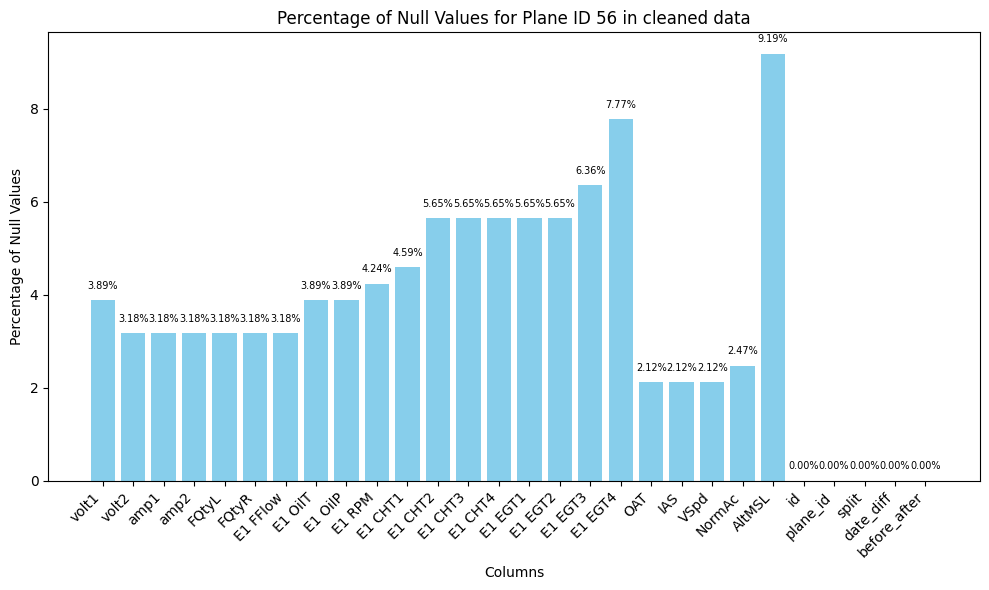

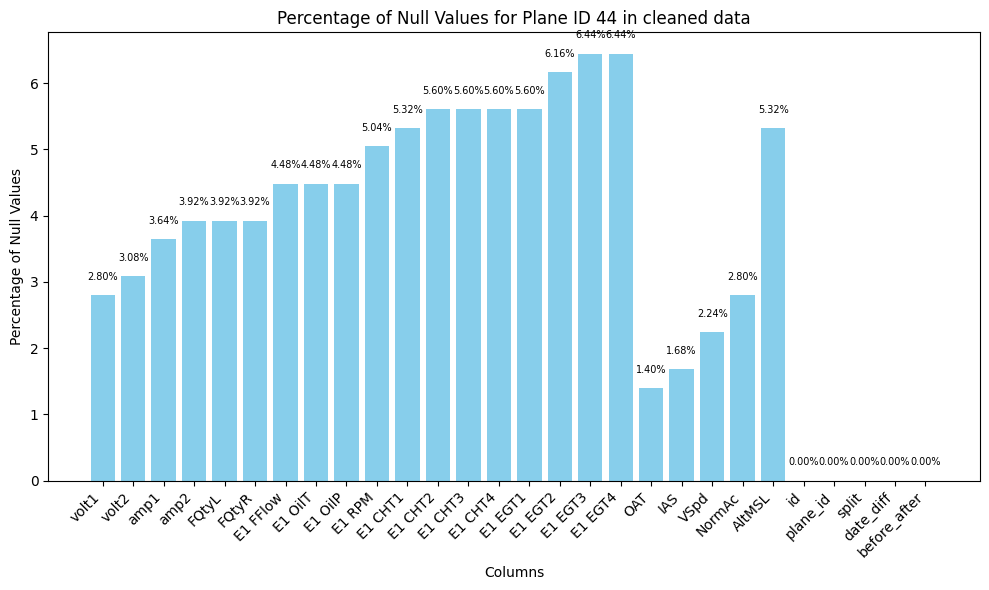

Plane ID 30 does not sum up to 100%
99.99999999999997


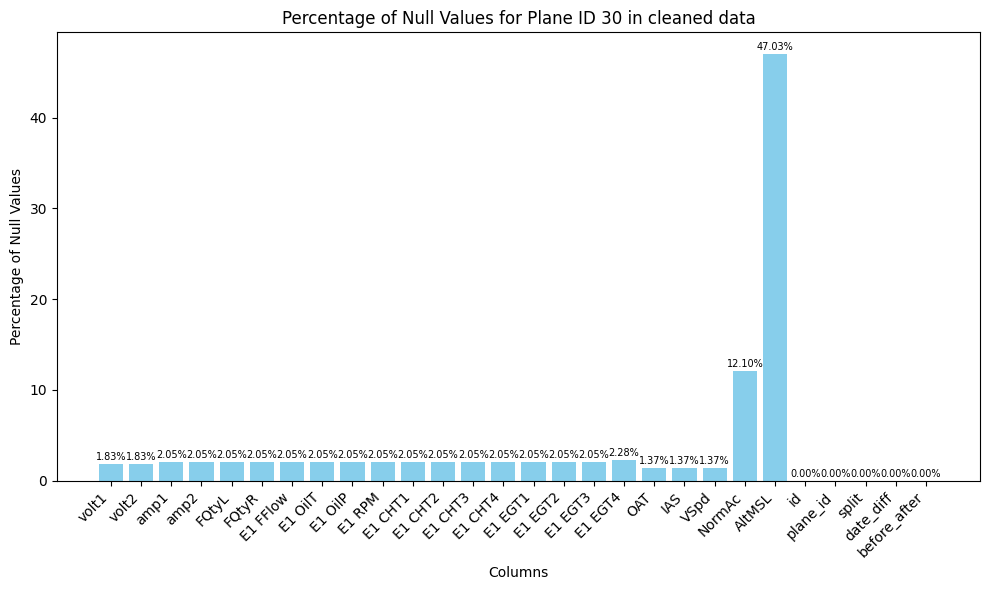

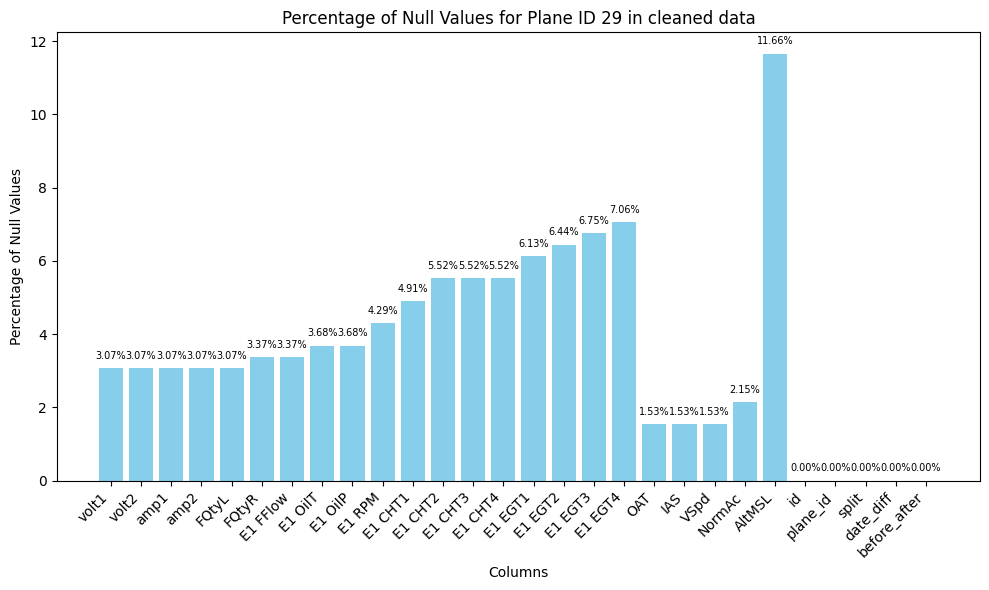

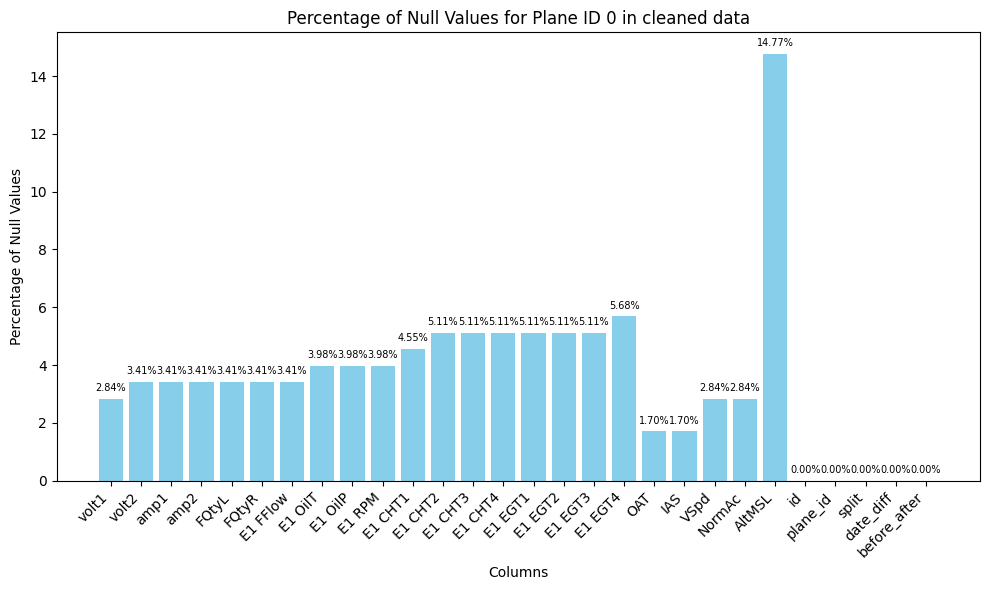

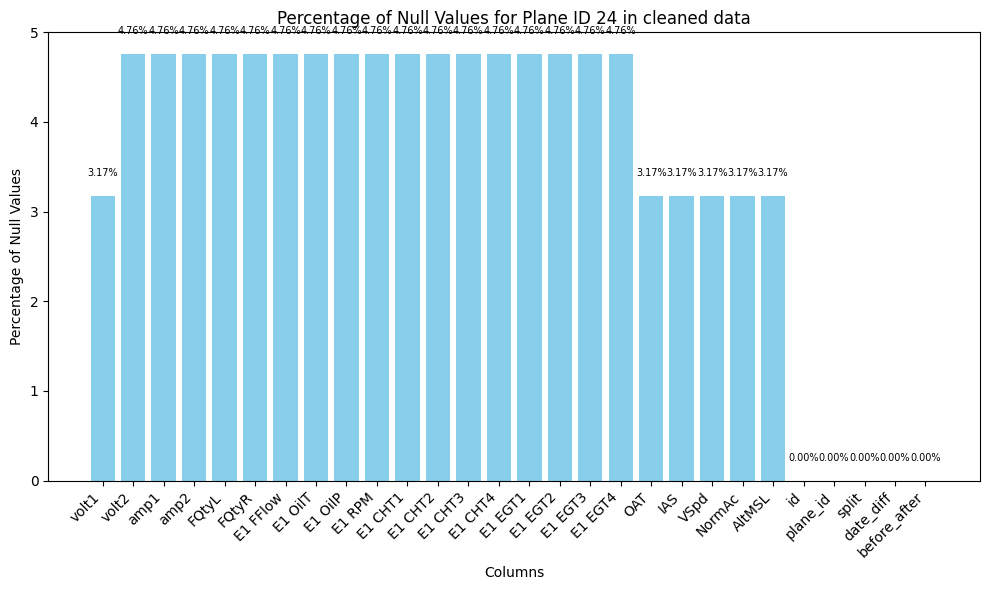

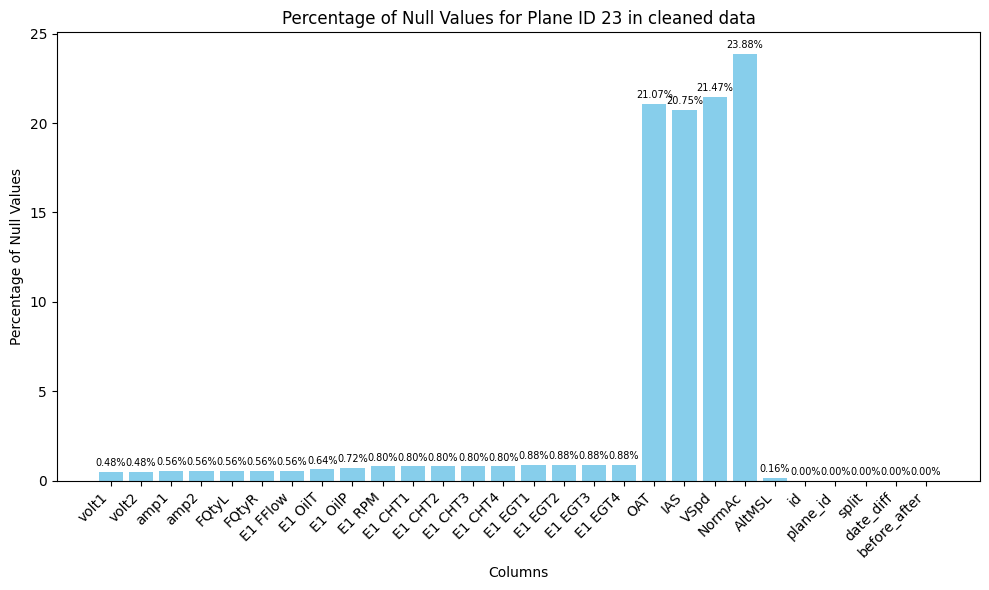

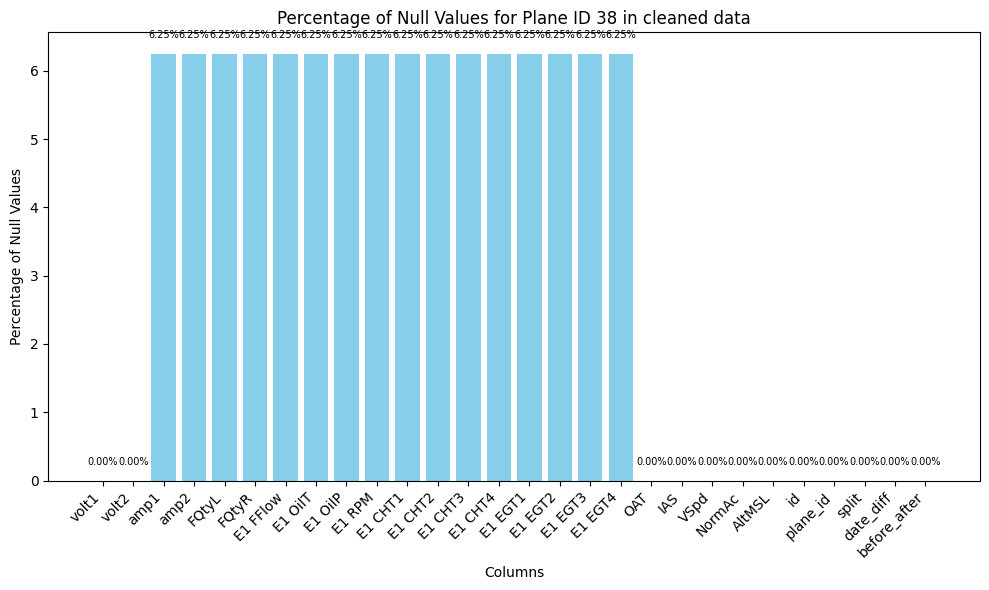

In [ ]:
# Calculate the percentage of null values in each column for the cleaned data
for plane_id in cleaned_data['plane_id'].unique():
    plane_data = cleaned_data[cleaned_data['plane_id'] == plane_id]
    total_null_values = plane_data.isnull().sum().sum()
    null_values = plane_data.isnull().sum() / total_null_values * 100

    # Plot the percentage of null values
    plt.figure(figsize=(10, 6))
    bars = plt.bar(null_values.index, null_values, color='skyblue')
    plt.title(f'Percentage of Null Values for Plane ID {plane_id} in cleaned data')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Null Values')

    # Annotate each bar with its percentage value
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.2, 
            f'{height:.2f}%', 
            ha='center', 
            va='bottom', 
            fontsize=7
        )

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()





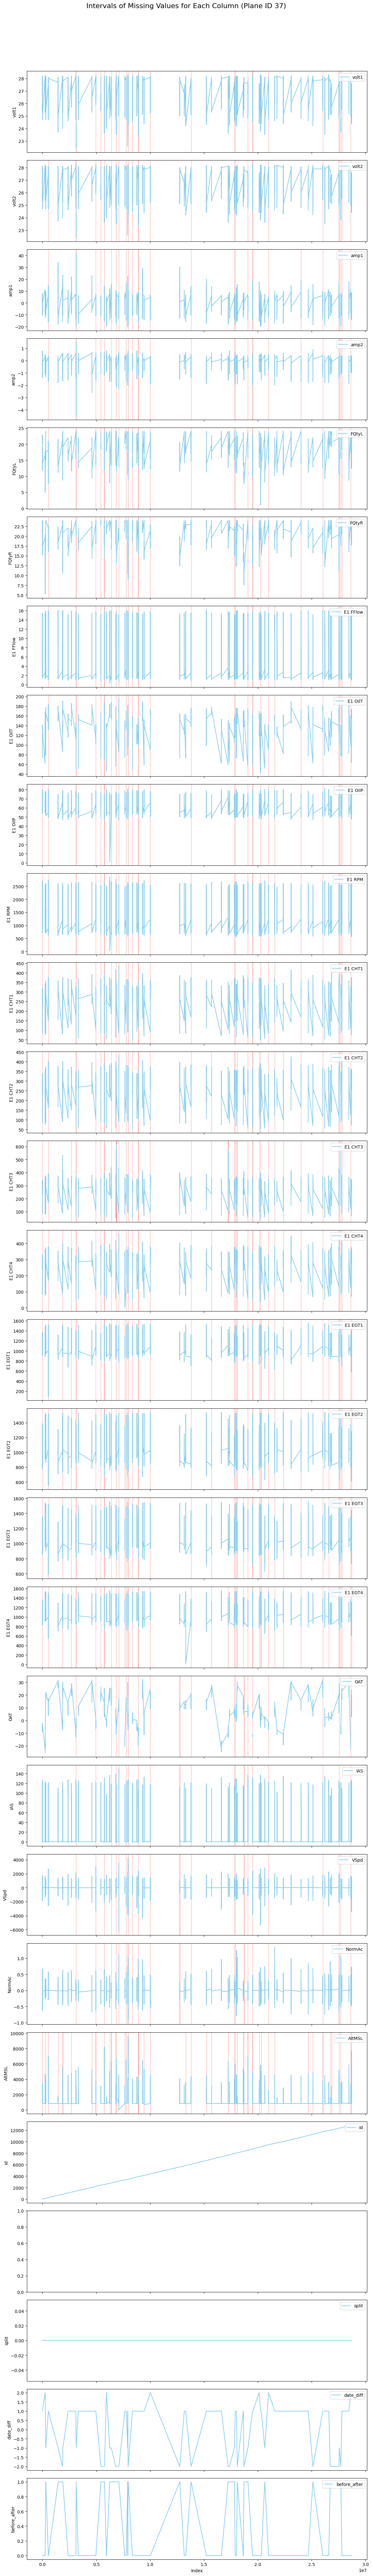

In [105]:
import matplotlib.pyplot as plt

# Filter data specific to plane 37
plane_37 = cleaned_data[cleaned_data['plane_id'] == 37]

# Set up the plot with a subplot for each column
num_columns = len(plane_37.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(12, num_columns * 3), sharex=True)
fig.suptitle('Intervals of Missing Values for Each Column (Plane ID 37)', fontsize=16)

# Loop through each column and plot
for i, column in enumerate(plane_37.columns):
    if column == 'plane_id':  # Skip 'plane_id' if it's not relevant
        continue

    # Identify NaN intervals
    na_intervals = []
    is_nan = plane_37[column].isna()
    start = None

    for j, nan in enumerate(is_nan):
        if nan and start is None:
            start = j
        elif not nan and start is not None:
            na_intervals.append((start, j - 1))
            start = None
    if start is not None:
        na_intervals.append((start, len(is_nan) - 1))

    # Plot the data
    axes[i].plot(plane_37.index, plane_37[column], label=column, color='skyblue')
    axes[i].set_ylabel(column)
    axes[i].legend(loc='upper right')

    # Shade NaN intervals with vertical spans and add horizontal lines
    for start, end in na_intervals:
        axes[i].axvspan(plane_37.index[start], plane_37.index[end], color='red', alpha=0.3)
        
        # Add horizontal line across the NaN interval
        median_value = plane_37[column].median()  # Choose a level (e.g., median or 0)
        axes[i].hlines(median_value, plane_37.index[start], plane_37.index[end], 
                       colors='black', linestyles='dotted', linewidth=1)

# Set labels and layout adjustments
plt.xlabel('Index')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit title
plt.show()


In [106]:
# remove all rows in cleaned_data with more than 3 columns nan
cleaned_data = cleaned_data.dropna(thresh=3)
#shape of the cleaned data
print(cleaned_data.shape)


(26798257, 28)


In [107]:
#check for null values
print(cleaned_data.isnull().sum())

volt1            1665
volt2            1711
amp1             2941
amp2             1849
FQtyL            4322
FQtyR            1735
E1 FFlow         2027
E1 OilT          2164
E1 OilP          2241
E1 RPM           2282
E1 CHT1          2400
E1 CHT2         10878
E1 CHT3          6183
E1 CHT4          2661
E1 EGT1          2822
E1 EGT2          2830
E1 EGT3          2907
E1 EGT4          2982
OAT             15293
IAS             15100
VSpd            15517
NormAc          22463
AltMSL          10047
id                  0
plane_id            0
split               0
date_diff           0
before_after        0
dtype: int64


# Truncation padding


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/planes/cleaned_flights/34_cleaned.csv')



In [2]:
# see the null values in the data
print(data.isnull().sum())
print(data.shape)

volt1           0
volt2           0
amp1            0
amp2            0
FQtyL           0
FQtyR           0
E1 FFlow        0
E1 OilT         0
E1 OilP         0
E1 RPM          0
E1 CHT1         0
E1 CHT2         0
E1 CHT3         0
E1 CHT4         0
E1 EGT1         0
E1 EGT2         0
E1 EGT3         0
E1 EGT4         0
OAT             0
IAS             0
VSpd            0
NormAc          0
AltMSL          0
id              0
plane_id        0
split           0
date_diff       0
before_after    0
dtype: int64
(652458, 28)


In [20]:
# get the unique'id' values in the data
unique_ids = data['id'].unique()
print(unique_ids)

[   87   147   435   468   595   599   614   690   711   729   816   947
  1240  1245  1295  1365  1516  1686  1811  1813  2297  2304  2378  2379
  2516  2538  2845  2894  2918  2983  3047  3351  3393  3406  3896  3905
  3934  3977  4000  4097  4164  4211  4334  4512  4725  4914  4917  4952
  5149  5210  5289  5299  5373  5426  5613  5797  5856  5893  5980  6027
  6088  6135  6146  6199  6361  6442  6466  6474  6586  6961  6965  7009
  7117  7189  7303  7337  7487  7641  7811  8036  8205  8572  8711  8821
  9035  9038  9714  9930  9964 10042 10287 10316 10472 10510 10584 10745
 10749 10763 10921 11014 11143 11205 11236 11243 11249 11524 11607 11612
 11679 11730 11782 11875 11879 12291 12402 12680 12756 12799]


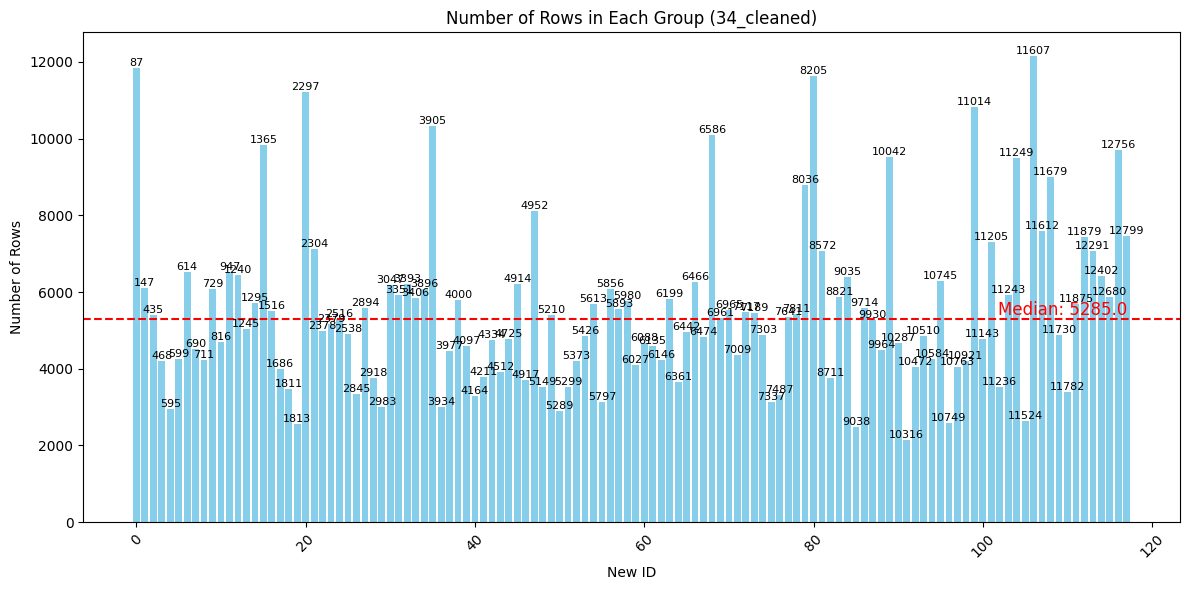

In [26]:
# Group by 'id' 
grouped_data = data.groupby('id', sort=False)

# Get the number of unique ids
num_unique_ids = data['id'].nunique()

# Create a new DataFrame with a new index from 0 to the number of unique ids
grouped_data = grouped_data.size().reset_index(name='count')
grouped_data['new_id'] = range(num_unique_ids)

# Calculate the median count
median_count = grouped_data['count'].median()

# Plot the number of rows per renamed 'id' group in a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data['new_id'], grouped_data['count'], color='skyblue')
plt.title('Number of Rows in Each Group (34_cleaned)')
plt.xlabel('New ID')
plt.ylabel('Number of Rows')

# Annotate each bar with the actual id number
for bar, actual_id in zip(bars, grouped_data['id']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.2, 
        f'{actual_id}', 
        ha='center', 
        va='bottom', 
        fontsize=8
    )

# Plot the median line
plt.axhline(median_count, color='r', linestyle='--')
plt.text(
    len(grouped_data) - 1, 
    median_count + 0.2, 
    f'Median: {median_count}', 
    ha='right', 
    va='bottom', 
    color='r', 
    fontsize=12
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

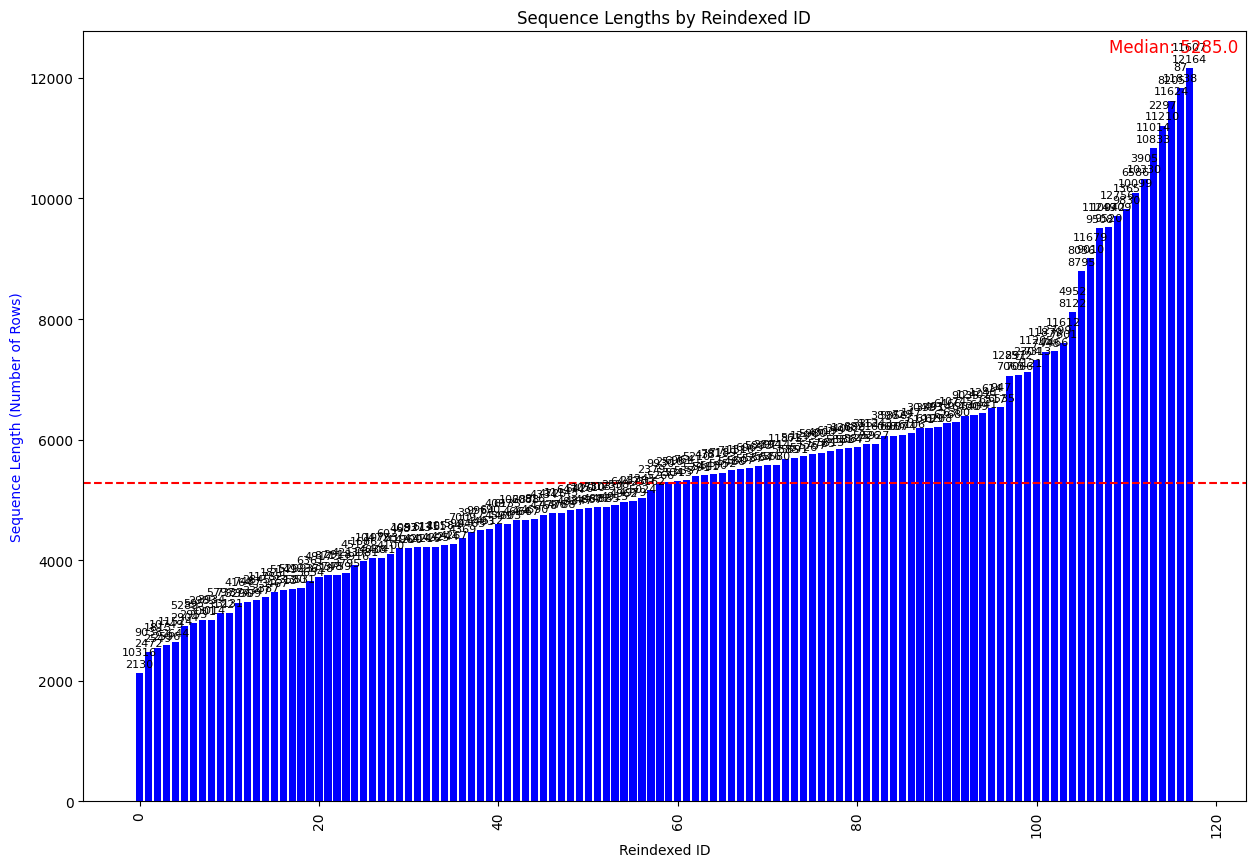

In [27]:
# Group the data by 'id'
id_groups = data.groupby('id', sort=False)

# Count the number of rows per 'id' and sort in ascending order
id_counts = id_groups.size().sort_values()

# Create a new DataFrame with a new index from 0 to the number of unique ids
id_counts_df = id_counts.reset_index(name='count')
id_counts_df['new_id'] = range(len(id_counts_df))

# Plot bar chart with actual frequencies
fig, ax1 = plt.subplots(figsize=(15, 10))

bars = ax1.bar(id_counts_df['new_id'], id_counts_df['count'], color='b')
ax1.set_xlabel('Reindexed ID')
ax1.set_ylabel('Sequence Length (Number of Rows)', color='b')

# Annotate bars with 'id' and counts
for bar, count, id_ in zip(bars, id_counts_df['count'], id_counts_df['id']):
    height = bar.get_height()
    ax1.annotate(f'{id_}\n{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Calculate and plot the median
median_count = id_counts_df['count'].median()
ax1.axhline(median_count, color='r', linestyle='--')
ax1.annotate(f'Median: {median_count}', xy=(1, 1), xytext=(-5, -5),
             xycoords='axes fraction', textcoords='offset points', ha='right', va='top', color='r', fontsize=12)

plt.title("Sequence Lengths by Reindexed ID")
plt.xticks(rotation=90)
plt.show()


In [29]:
#get the id with the rows closest to 5285
id_counts_df['count_diff'] = abs(id_counts_df['count'] - 5285)
closest_id = id_counts_df.sort_values('count_diff').iloc[0]['id']
print(closest_id)




9930


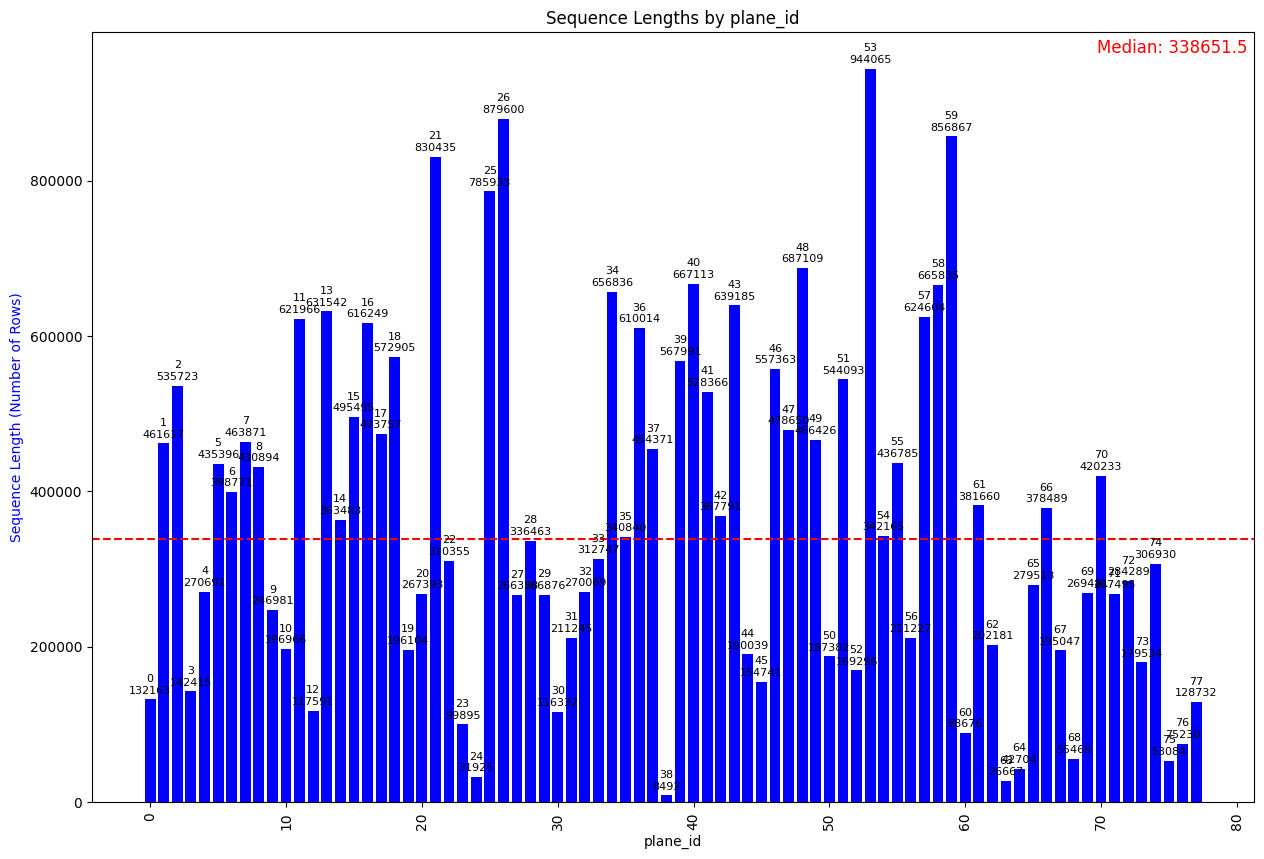

In [ ]:


# Count the number of rows per plane_id and sort in ascending order
plane_id_counts = plane_id.value_counts().sort_values()


# Plot bar chart with actual frequencies
fig, ax1 = plt.subplots(figsize=(15, 10))

bars = ax1.bar(plane_id_counts.index, plane_id_counts, color='b')
ax1.set_xlabel('plane_id')
ax1.set_ylabel('Sequence Length (Number of Rows)', color='b')

# Annotate bars with plane_id and counts
for bar, count, plane_id in zip(bars, plane_id_counts, plane_id_counts.index):
    height = bar.get_height()
    ax1.annotate(f'{plane_id}\n{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

# Calculate and plot the median
median_count = plane_id_counts.median()
ax1.axhline(median_count, color='r', linestyle='--')
ax1.annotate(f'Median: {median_count}', xy=(1, 1), xytext=(-5, -5),
             xycoords='axes fraction', textcoords='offset points', ha='right', va='top', color='r', fontsize=12)

plt.title("Sequence Lengths by plane_id")
plt.xticks(rotation=90)
plt.show()


In [5]:
%pip install tensorflow

# Define the maximum sequence length
max_sequence_length = 336463  # Median

# Group the data by 'plane_id'
grouped_data = data.groupby('plane_id')





  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/site-packages/google_pasta-0.2.0.dist-info/METADATA'

Note: you may need to restart the kernel to use updated packages.


# Cleaned 34

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/planes/cleaned_flights/34_cleaned.csv')
grouped_data = data.groupby('id', sort=False)

In [13]:
#capture id's of every group that has more than one unique 'before_after' value
problematic_ids = []
dict_labels = {}
for id_, group in grouped_data:
    dict_labels[id_] = group['before_after'].unique()
    if group['before_after'].nunique() > 1:
        problematic_ids.append(id_)
print(problematic_ids)

[]


In [17]:
assert len(dict_labels) == grouped_data.ngroups